# Lead Scoring Case Study

#### Problem Statement:
We are given with the problem statement that there is an e-learning based company "X Education"  which provides digital courses and education materials for learners who are already industry professionals or working in some other company. On a certain day, a considerable amount of working professionals land on their website in search of a course to explore and checkout the content and other things X Education offers.

The company does advertisements and webinars on various online platforms to make individuals land on their website for purchasing a course or fill a form for a connect with a member from support team for guidance or watch some videos. At this point when they provide their contact number, email then they are characterized to be a lead. Also X Education gets some of the leads from the past references or referrals. Following these things the support team reaches out to them by calls, emails to convert them to be their customer. But somehow most of the leads do not get converted and a typical conversion rate is said to be approximately 30% of the total leads. Means, out of every 100 leads, only 30 become their students. So, we can say that the conversion rate currently is poor. To make this process more proficient X Education plans to pinpoint the most potential leads as "Hot Leads" to boost the conversion rate and support team will focus more on these leads for contacting rather than contacting everyone.

X Education has offered us to develop a logistic regression model for assigning a lead score for every lead. We need to assign a lead score between 0 to 100 for every lead with 0 being the least probaility of getting converted and 100 being the hot lead or the higher probability of getting converted. As specified by the CEO the aim is conversion rate of around 80%.

We are provided with the dataset of around 9000 past leads which consists of different variables like lead source, total visits, last activity, etc and target variable "Converted" with value 0 as not converted and 1 as converted.

# Step 1: Data Loading and Understanding

Importing warnings and necessary libraries numpy for numerical calculations, pandas for dataframes, matplotlib and seaborn for visualizations and plots that need to be used for the analysis of the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the dataset day file as a dataframe and assigning it to the varible lead0 and then priting the dataframe for getting the idea of how the variables in the dataframe are and how does the original dataframe looks like.

In [3]:
lead0 = pd.read_csv("Leads.csv")
lead0.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# Step 2: Inspecting the Dataframe

Printing the columns of the lead0 dataset. For this dataset, our target columns is "Converted". We need to perform analysis and modelling on the dataset with respect to target variable.

In [4]:
lead0.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Checking the shape of the dataframe lead0 (no. of rows and no. of columns).

In [5]:
lead0.shape

(9240, 37)

Checking the dimension of the dataframe lead0.

In [6]:
lead0.ndim

2

.size method gives us the total number of elements across the whole dataset.

In [7]:
lead0.size

341880

Checking the data types of all the columns of the lead0 dataset.

In [8]:
lead0.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Checking the info() of the lead0 dataset

In [9]:
lead0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

.describe() function gives us the statistcial summary like mean, median, standard deviation, minimum, maximum, 25th percentile and 75th percentile for the columns that are numeric.

In [10]:
lead0.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Step 3: Data Preprocessing and Cleaning

In the data there are so many values as Select, that means visitor dosen't choose any thing so we replace Select as NAN

In [11]:
lead1 = lead0.replace("Select",np.NaN)

Now, checking for the duplicates in the rows. We assign a new variable leads_duplicates and copy lead1 data frame.

In [12]:
leads_duplicates = lead1.copy()

In [13]:
lead1.shape

(9240, 37)

Dropping the duplicates from leads_duplicates dataframe.

In [14]:
leads_duplicates.drop_duplicates(inplace = True)

In [15]:
leads_duplicates.shape

(9240, 37)

Since, we can clearly see that before dropping the duplicates as well as after dropping the duplicates, the shape of the dataframe is still same that means there were no duplicates in the original dataframe. So, we can go ahead with next steps using original dataframe only i.e. lead1

In [16]:
lead1

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No             NaN   
1                     2.50  ...                        No             NaN   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No             NaN   
4                     1.00  ...                        No             NaN   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                    NaN                   02.Medium   
1                    NaN                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

#### Missing value check

.isnull().sum() gives us the missing values for each and every column for that dataframe.

In [17]:
lead1.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

Multiplying the factor .isnull().sum() by 100 and then dividing it with the length of the dataframe gives us the null values percentage of every column.

In [18]:
round(100*(lead1.isnull().sum()/len(lead1.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Dropping the columns 'How did you hear about X Education,Lead Profile', they have missing value more than 70%

In [19]:
lead2 = lead1.drop(["How did you hear about X Education","Lead Profile"], axis = 1)

Now, checking the missing values percentage again.

In [20]:
round(100*(lead2.isnull().sum()/len(lead2.index)),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me 

Lead Quality has around 52% of missing values. Lets inspect them.

In [21]:
lead2["Lead Quality"].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

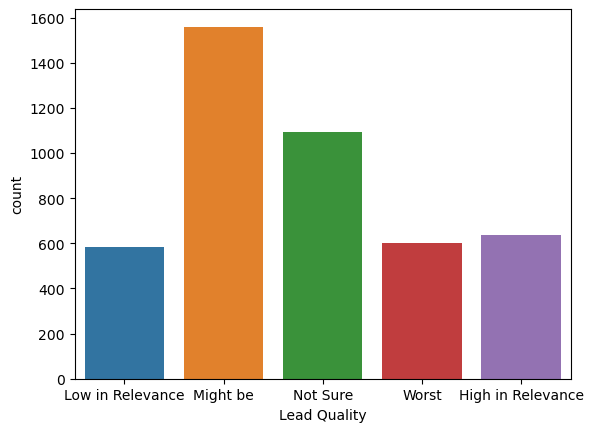

In [22]:
sns.countplot(x = lead2["Lead Quality"], data = lead2)
plt.show()

Lead Quality column has 52% missing value are there so we need to replace it ,'Not Sure' seems to be good to replace.

In [23]:
lead2["Lead Quality"] = lead2['Lead Quality'].replace(np.NaN,"Not Sure")

Now chekcing the null values % again.

In [24]:
round(100*(lead2.isnull().sum()/len(lead2.index)),2).sort_values(ascending = False)

Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Get updates on DM Content                         0.00
Update me 

Columns named "Asymmetrique Activity Index", "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index" have 45.65% missing values. Lets check each of them.

In [25]:
lead2["Asymmetrique Activity Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [26]:
lead2["Asymmetrique Activity Score"].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [27]:
lead2["Asymmetrique Profile Index"].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [28]:
lead2["Asymmetrique Profile Score"].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

Plotting varibales "Asymmetrique Activity Index", "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index".

<Axes: xlabel='Asymmetrique Profile Score'>

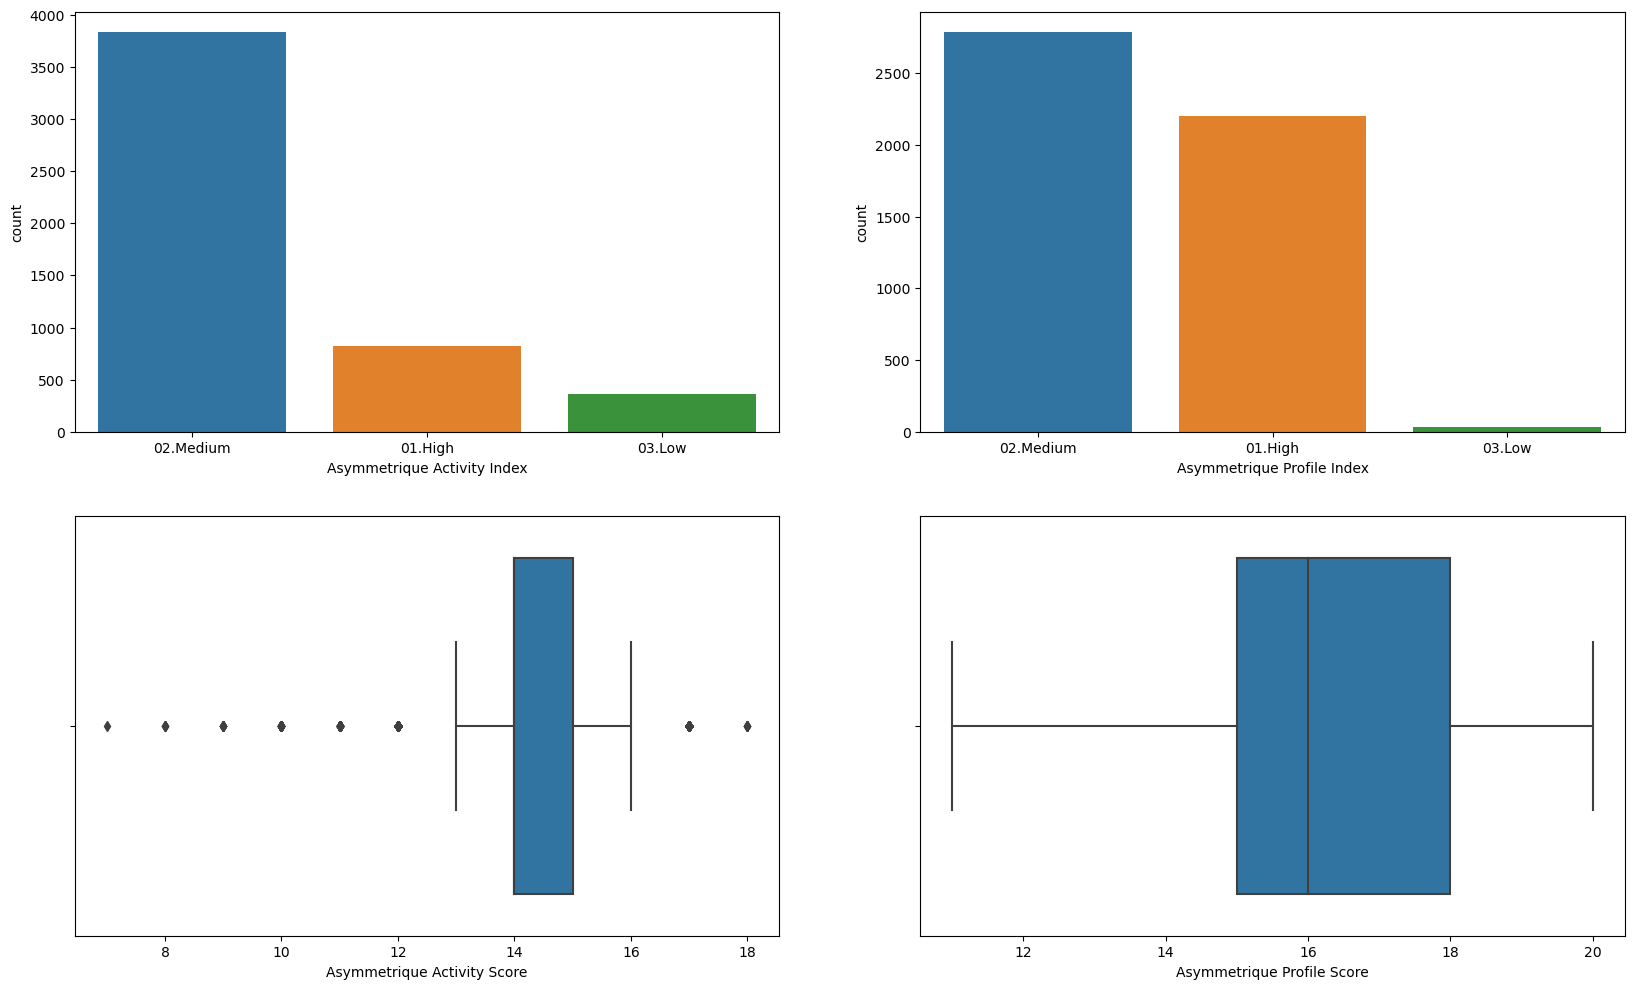

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.countplot(x = 'Asymmetrique Activity Index', data = lead2)
plt.subplot(2,2,2)
sns.countplot(x = 'Asymmetrique Profile Index',  data = lead2)
plt.subplot(2,2,3)
sns.boxplot(x = 'Asymmetrique Activity Score',  data = lead2)
plt.subplot(2,2,4)
sns.boxplot(x = 'Asymmetrique Profile Score', data = lead2)

There is variation in data in these four columns, and we were looking at the data in order to impute the NULL values (which are 45%). So we cant make a conclusive decision on this so we drop these columns.

In [30]:
lead2 = lead2.drop (['Asymmetrique Activity Index','Asymmetrique Profile Index',
                     'Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [31]:
round(100*(lead2.isnull().sum()/len(lead2.index)),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Lead Quality                                      0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

Now, checking the specialization columns which has 36.58% of missing values.

In [32]:
lead2["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Plotting a coutplot for values of Specialization.

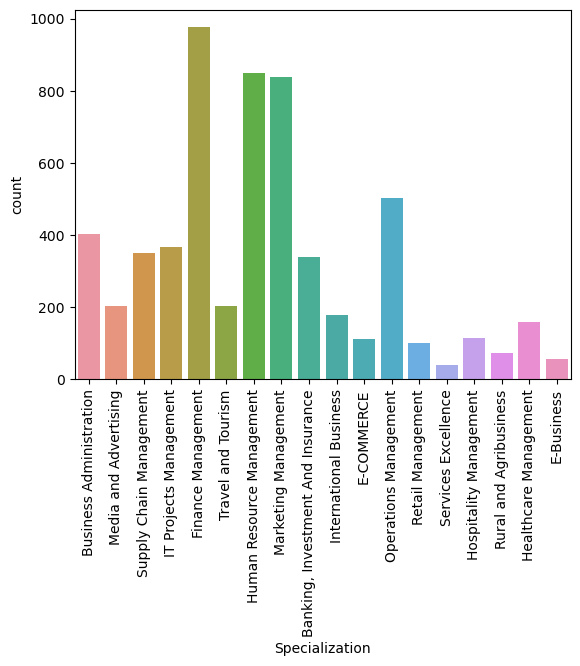

In [33]:
sns.countplot(x = "Specialization", data = lead2)
plt.xticks(rotation=90)
plt.show()

Checking the statistical summary of Specialization.

In [34]:
lead2["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

"Finance Management" has the highest count but overall not very high proportion so we replace NULL with "Others"

In [35]:
lead2["Specialization"] = lead2["Specialization"].replace(np.NaN,"Others")

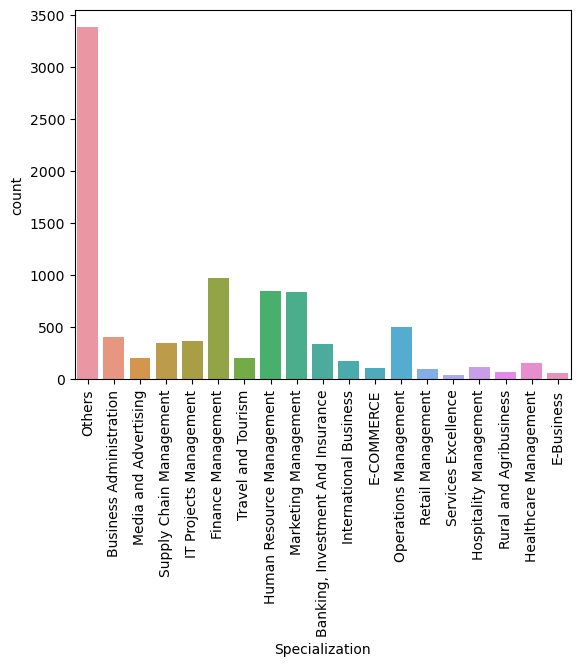

In [36]:
sns.countplot(x = "Specialization", data = lead2)
plt.xticks(rotation=90)
plt.show()

Now, checking the column Tags which has 36.29% missing values.

In [37]:
lead2["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Plotting coultplot for values of Tags column.

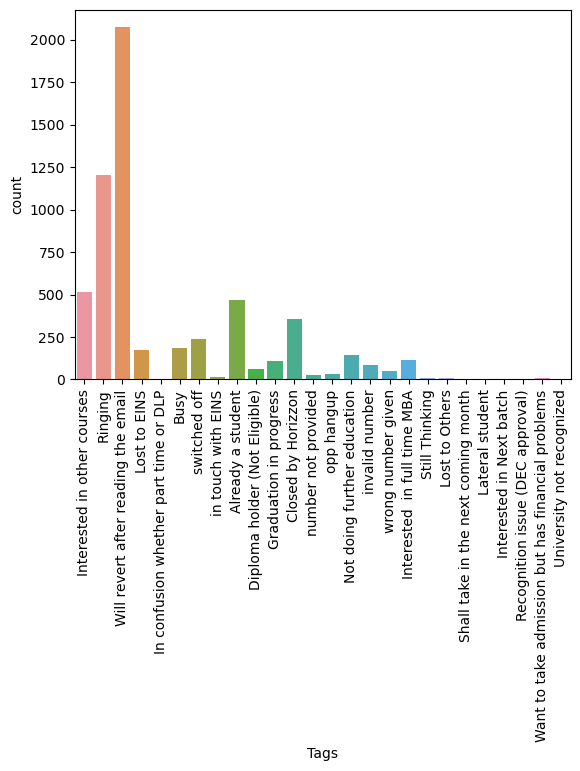

In [38]:
sns.countplot(x = "Tags", data = lead2)
plt.xticks(rotation = 90)
plt.show()

"Will revert after reading the email" has the highest count in all the tags so we replace NULL values with that value.

In [39]:
lead2["Tags"] = lead2["Tags"].replace(np.NaN, "Will revert after reading the email")

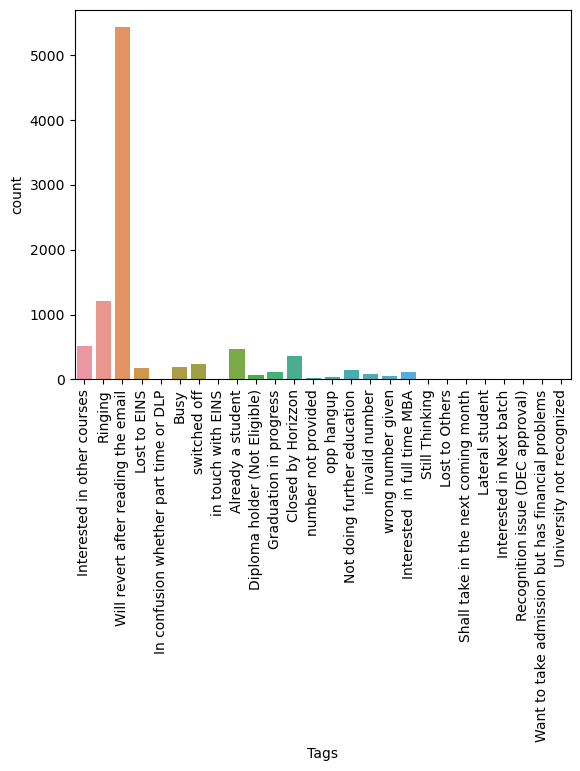

In [40]:
sns.countplot(x = "Tags", data = lead2)
plt.xticks(rotation = 90)
plt.show()

Now, checking column "What matters most to you in choosing a course" which has 29.32% missing values.

In [41]:
lead2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

"Better Career Prospects" has the highest count, so replace null values with it.

In [42]:
lead2["What matters most to you in choosing a course"] = lead2['What matters most to you in choosing a course'].replace(np.NaN,"Better Career Prospects")

Now, checking column "What is your current occupation".

In [43]:
lead2["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

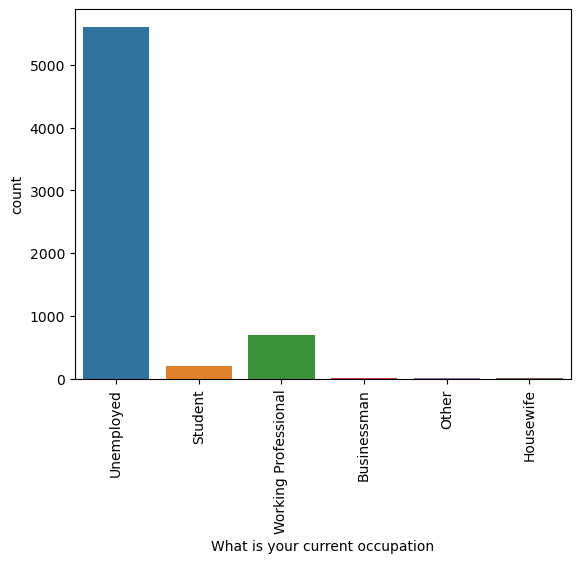

In [44]:
sns.countplot(x = 'What is your current occupation', data = lead2)
plt.xticks(rotation = 90)
plt.show()

Unemployed is the most occurence in the column so we are replacing null values with unemployed.

In [45]:
lead2["What is your current occupation"] = lead2["What is your current occupation"].replace(np.NaN,"Unemployed")

City column has 39.71 % missing values. Lets check.

In [46]:
lead2["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

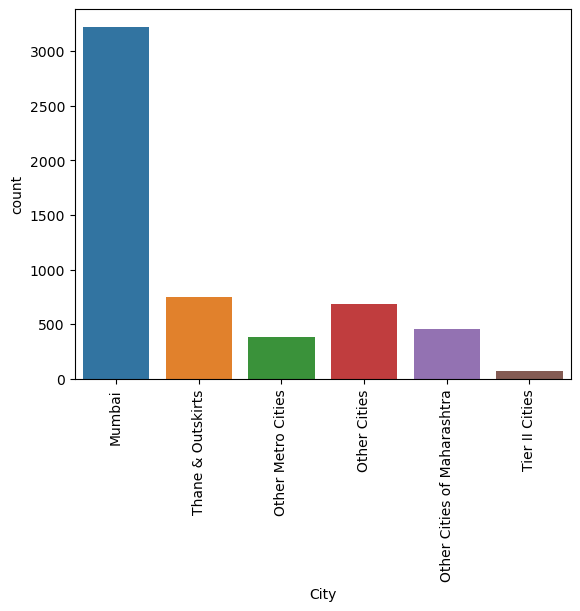

In [47]:
sns.countplot(x = 'City', data = lead2)
plt.xticks(rotation = 90)
plt.show()

Most city is mumbai so we can replace null value with Mumbai.

In [48]:
lead2["City"] = lead2["City"].replace(np.NaN,"Mumbai")

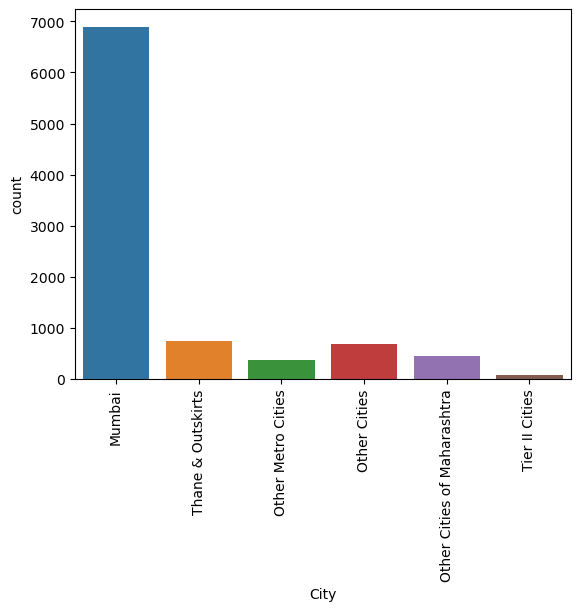

In [49]:
sns.countplot(x = 'City', data = lead2)
plt.xticks(rotation = 90)
plt.show()

Country column has 26.63% nulls. Lets check.

In [50]:
lead2["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

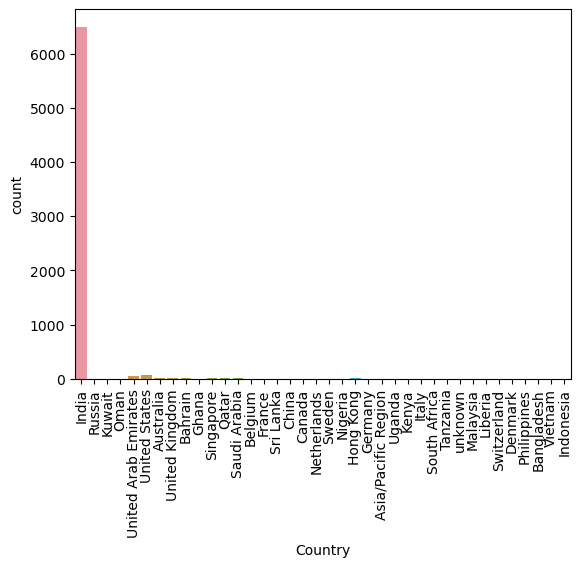

In [51]:
sns.countplot(x = 'Country', data = lead2)
plt.xticks(rotation = 90)
plt.show()

In [52]:
lead2["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

"India" has very high count so we can safely replace nulls with "India".

In [53]:
lead2["Country"] = lead2["Country"].replace(np.NaN, "India")

Checking the statistical summary for the columns 'Page Views Per Visit' and 'TotalVisits' since they both have 1.48% null values.

In [54]:
lead2['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [55]:
lead2['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Totalvisits and Page View Per Visit, both are the numerical columns so we are replacing the null values with the mean.

In [56]:
lead2["Page Views Per Visit"] = lead2["Page Views Per Visit"].replace(np.NaN,lead2["Page Views Per Visit"].mean())
lead2["TotalVisits"] = lead2['TotalVisits'].replace(np.NaN,lead2["TotalVisits"].mean())

Now checking the columns "Last Activity" which has 1.11% missing values.

In [57]:
lead2['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Since, we have very less number of null values for this column, we can drop the rows which contain null values with "Email Opened".

In [58]:
lead2['Last Activity'] = lead2['Last Activity'].replace(np.NaN,"Email Opened")

Now checking the columns "Lead Source" which has 0.39% missing values.

In [59]:
lead2["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Since, we have very less number of null values for this column, we can drop the rows which contain null values with "Google".

In [60]:
lead2["Lead Source"] = lead2['Lead Source'].replace(np.NaN,'Google')

We are done with the missing values treatment now, checking once again we can see there is no missing value in the dataset.

In [61]:
round(100*(lead2.isnull().sum()/len(lead2.index)),2).sort_values(ascending = False)

Prospect ID                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Lead Quality                                     0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Number                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation               

# Step 4: Exploratory Data Analysis (E.D.A)

#### Univariate Analysis And Bivariate analysis

Displaying basic statistics for the 'Converted' column in the 'lead2' DataFrame.

In [62]:
lead2["Converted"].describe()

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

Plotting count of 'Lead Origin' with conversion status.

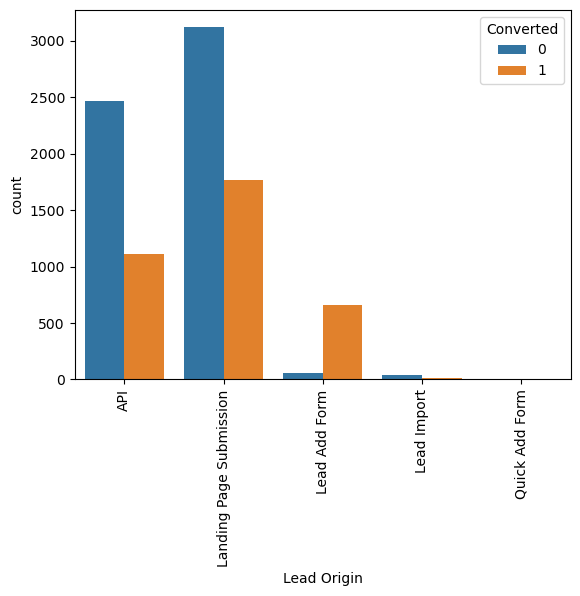

In [63]:
sns.countplot(x = 'Lead Origin', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

#### Observations: 

#### API and Landing Page submission have approximately 40% and 56% conversion rate and overall count from these two sources are high.

#### Lead Add Form has very high conversion rate but overall conversion count is very low.

#### Since we have high conversion counts from API and Landing Page Submissions, we can focus on increasing the conversion rate from these two sources.

Now, plotting count of Lead Source with conversion status.

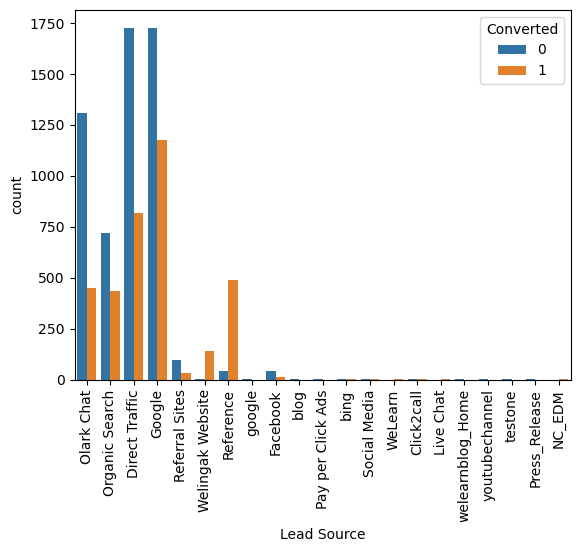

In [64]:
sns.countplot(x = 'Lead Source', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

In the Lead Source column there are two value as 'Google' and ' google' both are same so we will combine this values as 'Google'

In [65]:
lead2['Lead Source'] = lead2['Lead Source'].replace('google','Google')

In the 'Lead Source' column there are so many categories which count is negligible so we can combine all as others.

In [66]:
lead2['Lead Source']=lead2['Lead Source'].replace(['blog','Pay per Click Ads', 'bing', 'Social Media', 
                                                   'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 
                                                   'youtubechannel','testone', 'Press_Release', 'NC_EDM'],'Others')

Now, again after editing, plotting count of Lead Source with conversion status.

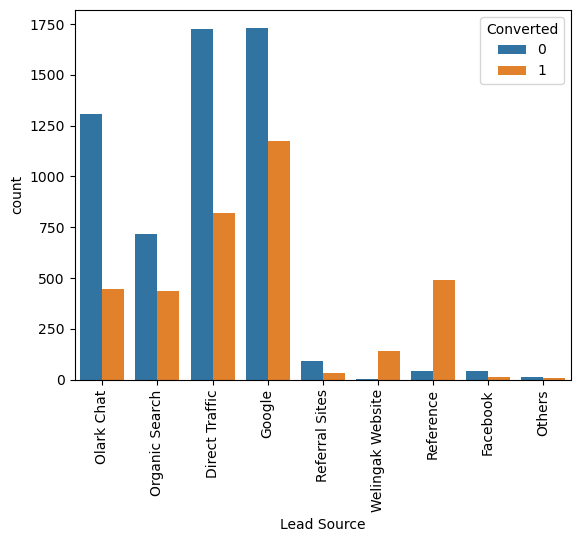

In [67]:
sns.countplot(x = 'Lead Source', hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

#### Observations:

#### Direct Traffic and Google have similar counts with Google having highest conversion rates.

#### Organic Search also has a relatively high conversion rate.

#### Same goes for Reference but overall count is very less.

#### To increase the overall conversion rate, we can focus on increasing the conversion rates from Google, Direct Traffic, Organic Search and Olark chat.

Now creating subplots to display count plots for 'Do Not Email' and 'Do Not Call' with conversion status.

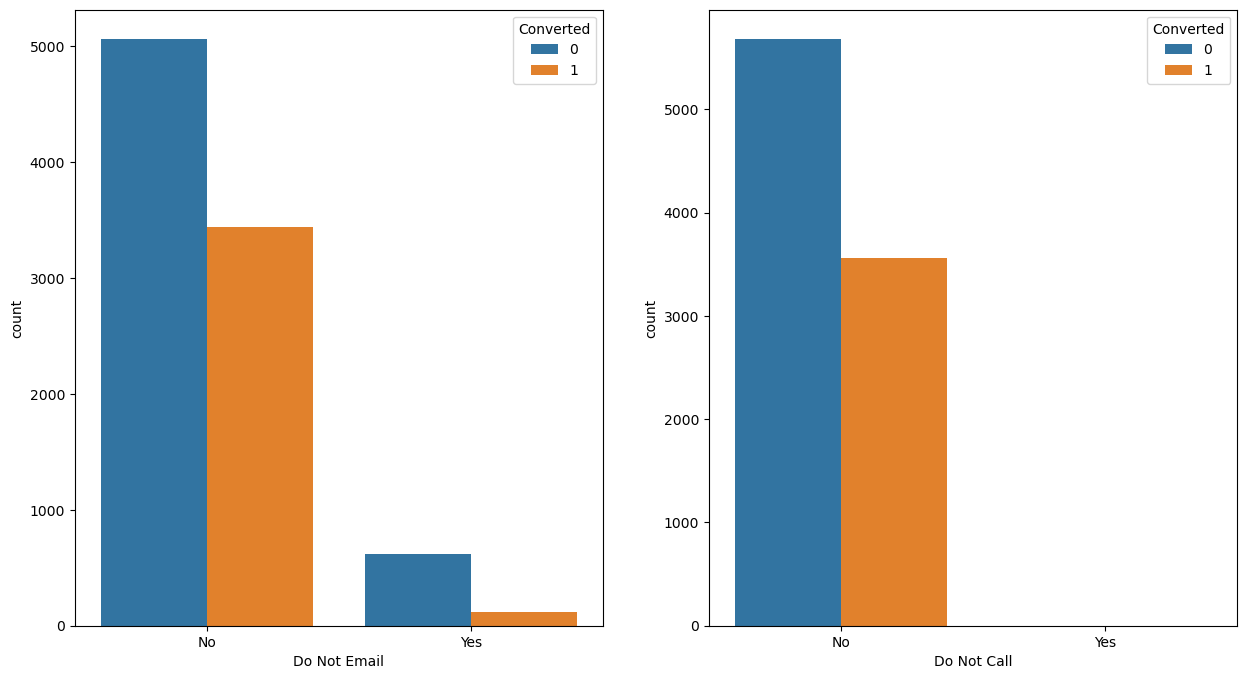

In [68]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = 'Do Not Email', hue = "Converted", data = lead2)
plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Call', hue = "Converted", data = lead2)
plt.show()

#### Observations:

#### People who said that they don't want to be Emailed have higher conversion rate than people who said that they wanted to be Emailed.

#### Same goes for the Do Not Call column as well.

Lets check values for the column TotalVisits.

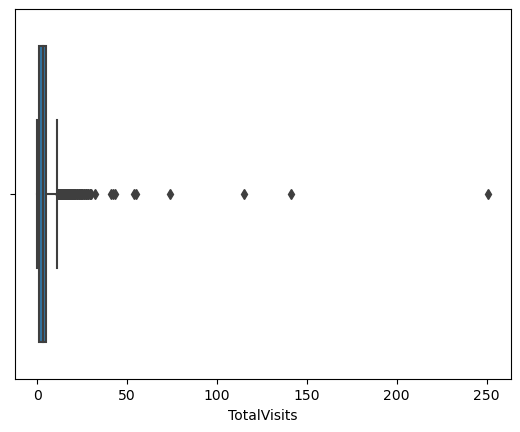

In [69]:
sns.boxplot(x = lead2["TotalVisits"])
plt.show()

Checking the quantiles.

In [70]:
lead2["TotalVisits"].describe(percentiles = [0.90,0.95,0.96,0.97,0.99])

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
50%         3.000000
90%         7.000000
95%        10.000000
96%        10.000000
97%        11.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

Assigning TotalVisits column the values till 95th percentile.

In [71]:
lead2 = lead2[lead2.TotalVisits < lead2.TotalVisits.quantile(0.95)]

Now, Lets check values for the column TotalVisits.

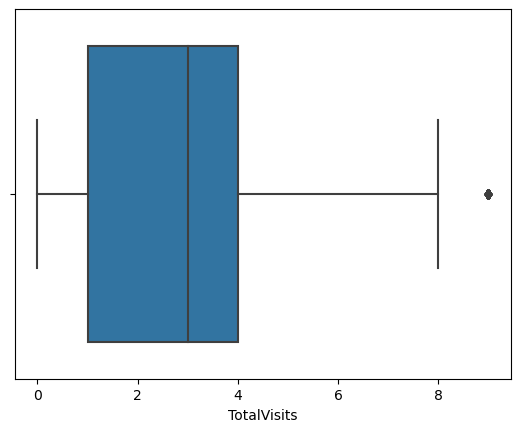

In [72]:
sns.boxplot(x = lead2["TotalVisits"])
plt.show()

Now checking TotalVisits with Target column Converted.

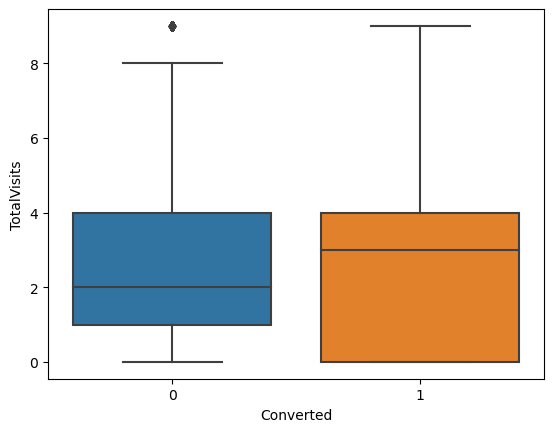

In [73]:
sns.boxplot(y = lead2["TotalVisits"], x = lead2["Converted"], data = lead2)
plt.show()

#### Observations:

#### Medians for not converted and converted are almost same.

#### People with 0 - 6 visits are seen to be converted but then again people with 1 - 4 visits are also seen to not be converted so nothing conclusive is observed from this column.


Now checking the column "Page Views Per Visit".

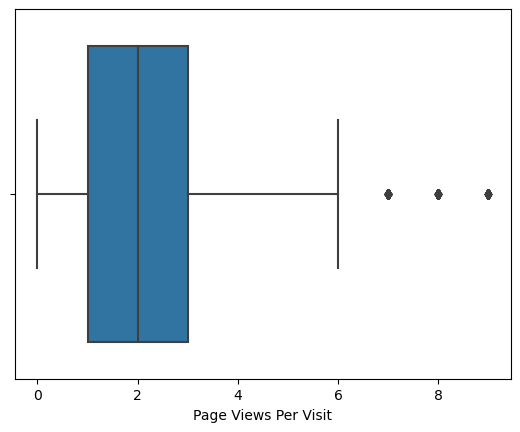

In [74]:
sns.boxplot(x = lead2["Page Views Per Visit"])
plt.show()

Checking the quantiles.

In [75]:
lead2["Page Views Per Visit"].describe(percentiles=[0.90,0.95,0.97,0.99])

count    8773.000000
mean        2.216707
std         1.870736
min         0.000000
50%         2.000000
90%         5.000000
95%         6.000000
97%         6.000000
99%         8.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

Assigning values for this column till 95th quantile.

In [76]:
lead2 = lead2[lead2["Page Views Per Visit"] < lead2['Page Views Per Visit'].quantile(0.95)]

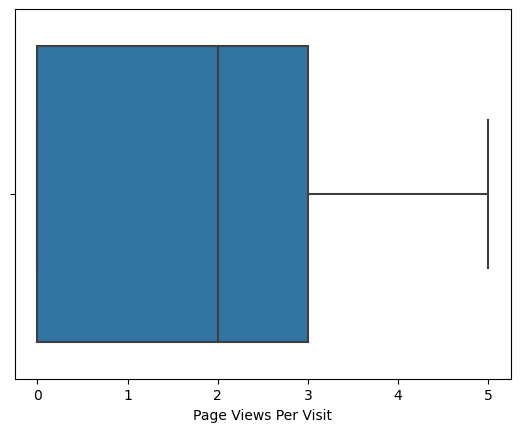

In [77]:
sns.boxplot(x=lead2["Page Views Per Visit"])
plt.show()

#### Observations:

#### Medians for both conversions and non conversions is same.

#### So nothing conclusive can be said here.


Now checking the values for the column "Total Time Spent on Website".

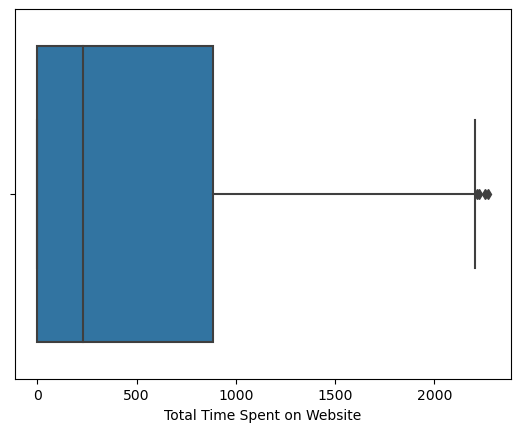

In [78]:
sns.boxplot(x=lead2["Total Time Spent on Website"])
plt.show()

Values are seggregated correctly.

Now plotting boxplot for columns "Total Time Spent on Website" with respect to Target variable Converted.

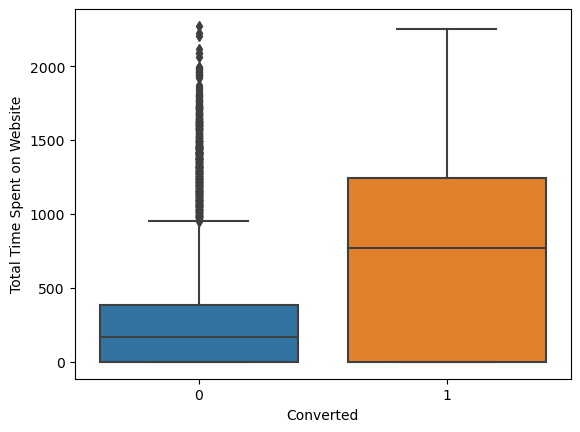

In [79]:
sns.boxplot(y = lead2["Total Time Spent on Website"], x = lead2["Converted"], data = lead2)
plt.show()

#### Observations:

#### People spending more time on the wesbite are more likely to be converted.

#### Keeping the website updated regularly is recommended.


Now plotting the counts for column "Last Activity".

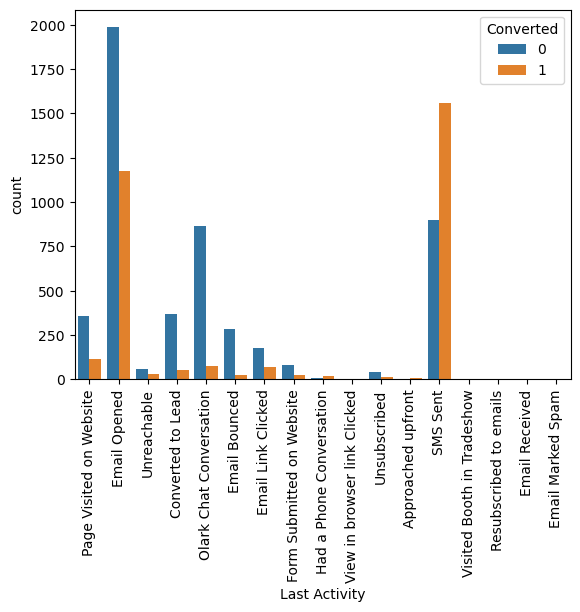

In [80]:
sns.countplot(x = lead2["Last Activity"], hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

Since certain categorical values have negligible count as compared to the more prominent ones, we can combine them into Others category.

In [81]:
lead2["Last Activity"] = lead2['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                         'Approached upfront', 'Email Received','Had a Phone Conversation',
                                                         'Email Marked Spam','View in browser link Clicked'],'Others')

Now again plotting the counts for column "Last Activity".

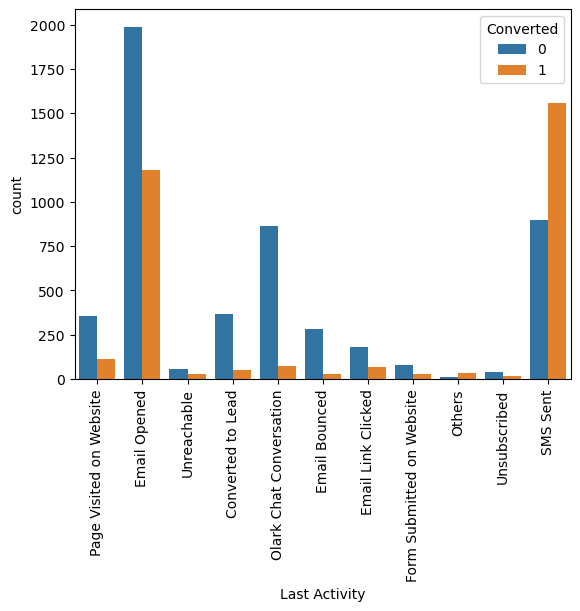

In [82]:
sns.countplot(x = lead2["Last Activity"], hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

#### Observations:

#### People getting SMS have the highest conversion rate although their count is second highest, with people who are opening the emails having the highest count.

#### People having Olark char conversations are significant in number although their conversion rate is very low.

#### Focus can be on increasing conversion rates for Email Opened, SMS sent, Olark chat conversations.



Now plotting the counts for column "Country" wrt Converted.

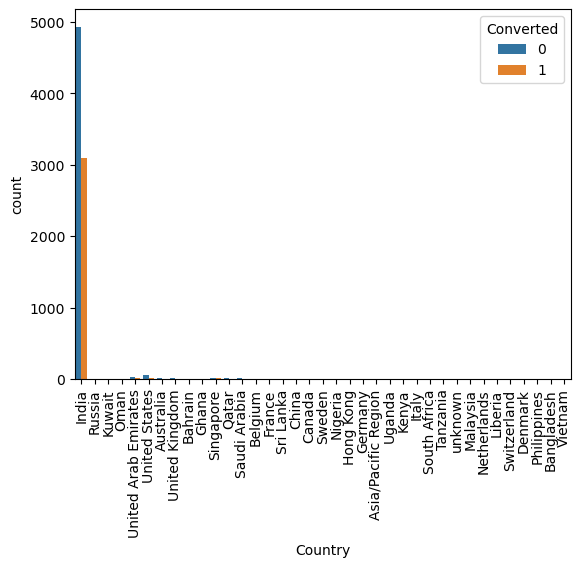

In [83]:
sns.countplot(x = "Country", hue = "Converted", data = lead2)
plt.xticks(rotation = 90)
plt.show()

Since certain categorical values have negligible count as compared to the more prominent ones, we can combine them into Others_countries category.

In [84]:
lead2["Country"]=lead2["Country"].replace(['Qatar','Saudi Arabia','Hong Kong','Bahrain','Oman', 'France','unknown',
                                           'South Africa','Nigeria','Germany', 'Kuwait','Canada','Sweden','China',
                                           'Asia/Pacific Region','Uganda','Bangladesh','Italy','Belgium','Netherlands',
                                           'Ghana','Philippines','Russia','Switzerland','Vietnam','Denmark','Tanzania',
                                           'Liberia','Malaysia','Kenya','Sri Lanka','Indonesia'],'Others_countries')

Now again plotting the counts for column "Country" wrt Converted.

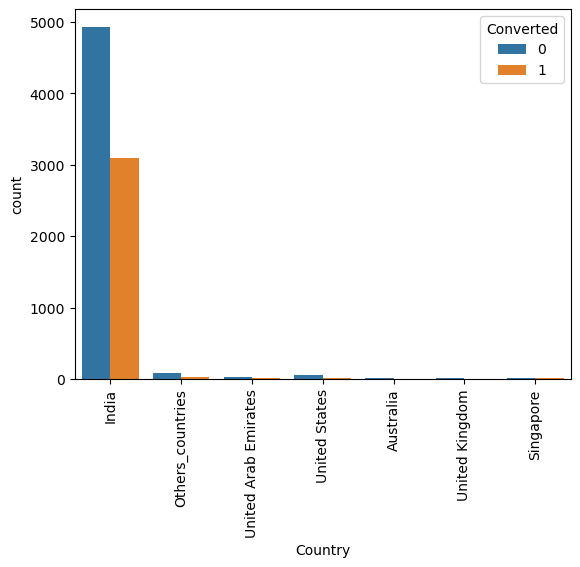

In [85]:
sns.countplot(x="Country",hue="Converted",data=lead2)
plt.xticks(rotation=90)
plt.show()

#### Observations:

#### Not much to conclude as India still has the highest count.

Now plotting the counts for column "Specialization" wrt Converted.

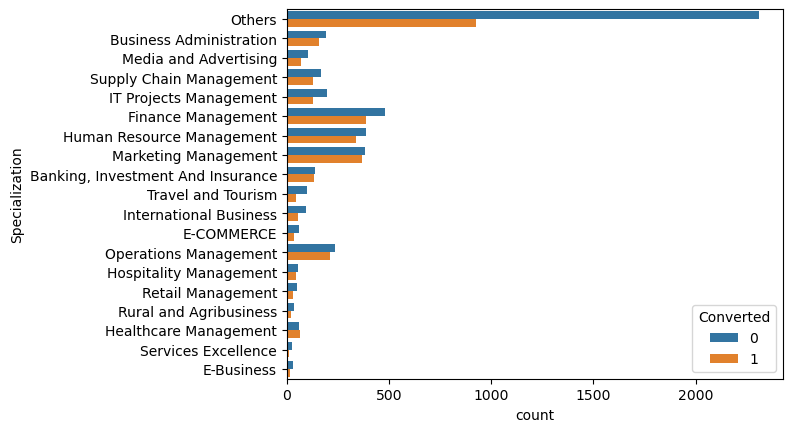

In [86]:
sns.countplot( y = lead2["Specialization"], hue = lead2["Converted"], data = lead2)
plt.show()

#### Observation:

#### We need to focus on specializations having high conversion rates and try to increase them even further i.e. Finance Management, HR Management, Marketing Management, Operations Management etc.

Now plotting the counts for column "What is your current occupation" wrt Converted.

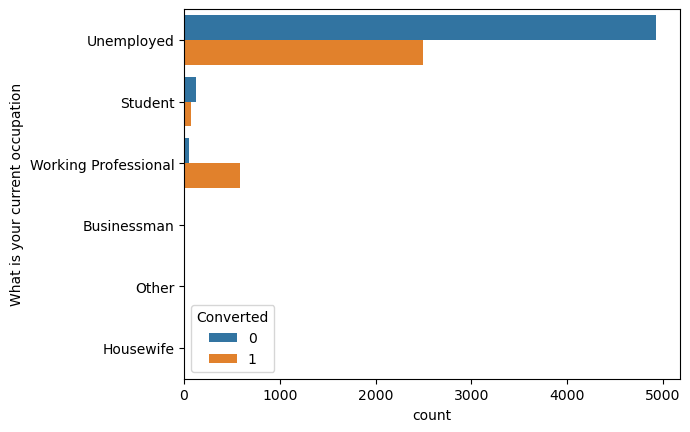

In [87]:
sns.countplot(y=lead2["What is your current occupation"],hue=lead2["Converted"],data=lead2)
plt.show()

#### Observations:

#### Working professionals have high conversion rates although very less count.

#### Unemploeyed people, although high in number, have low conversion rate.

#### Increasing the number of working professionals signing up and increasing the conversion rates of unemployed people will help.

Checking the summary of columns "What matters most to you in choosing a course", "Search", "Magazine", etc

In [88]:
lead2["What matters most to you in choosing a course"].describe()

count                        8290
unique                          3
top       Better Career Prospects
freq                         8287
Name: What matters most to you in choosing a course, dtype: object

Since most entries are Better Career prospects, we can't conclude much here.

In [89]:
lead2["Search"].describe()

count     8290
unique       2
top         No
freq      8285
Name: Search, dtype: object

Most entries are No. Nothing to conclude here.

In [90]:
lead2["Magazine"].describe()

count     8290
unique       1
top         No
freq      8290
Name: Magazine, dtype: object

Most entries are No. Nothing to conclude here.

In [91]:
lead2["Newspaper Article"].describe()

count     8290
unique       1
top         No
freq      8290
Name: Newspaper Article, dtype: object

Most entries are No. Nothing to conclude here

In [92]:
lead2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
lead2["X Education Forums"].describe()

count     8290
unique       1
top         No
freq      8290
Name: X Education Forums, dtype: object

Most entries are No. Nothing to conclude here.

In [94]:
lead2["Newspaper"].describe()

count     8290
unique       1
top         No
freq      8290
Name: Newspaper, dtype: object

Most entries are No. Nothing to conclude here.

In [95]:
lead2["Digital Advertisement"].describe()

count     8290
unique       2
top         No
freq      8288
Name: Digital Advertisement, dtype: object

Most entries are No. Nothing to conclude here.

In [96]:
lead2["Through Recommendations"].describe()

count     8290
unique       2
top         No
freq      8287
Name: Through Recommendations, dtype: object

Most entries are No. Nothing to conclude here.

In [97]:
lead2["Receive More Updates About Our Courses"].describe()

count     8290
unique       1
top         No
freq      8290
Name: Receive More Updates About Our Courses, dtype: object

Most entries are No. Nothing to conclude here.

Plotting the count of column Tags wrt Converted.

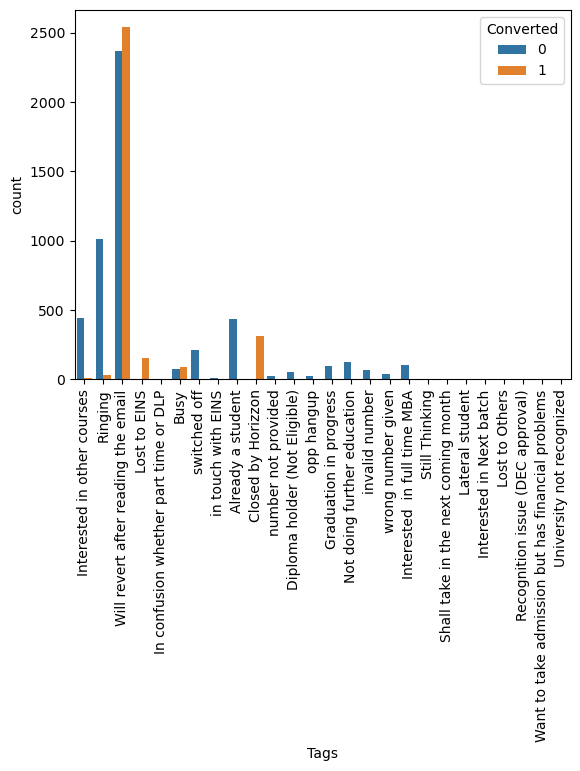

In [98]:
sns.countplot(x=lead2["Tags"],hue=lead2["Converted"],data=lead2)
plt.xticks(rotation=90)
plt.show()

Since certain categorical values have negligible count as compared to the more prominent ones, we can combine them into Others category.

In [99]:
lead2["Tags"] = lead2["Tags"].replace(['In confusion whether part time or DLP','Still Thinking',
                                       'Shall take in the next coming month','Lateral student',
                                       'Lost to Others','in touch with EINS','Recognition issue (DEC approval)',
                                       'Want to take admission but has financial problems','University not recognized',
                                       'Interested in Next batch'],'Others')

Again plotting the count of column Tages wrt Converted.

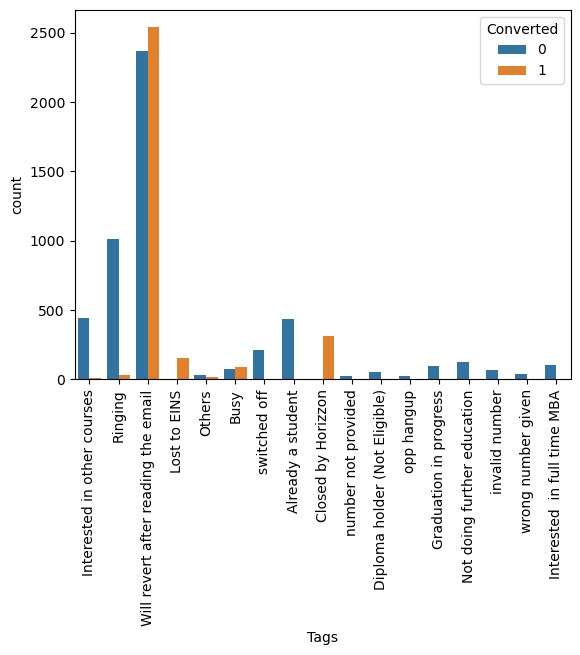

In [100]:
sns.countplot(x=lead2["Tags"],hue=lead2["Converted"],data=lead2)
plt.xticks(rotation=90)
plt.show()

#### Observations:

#### People who say they will revert after reading the email have the highest conversion rates.

#### People who have been called and are not picking up are high in count but very low in terms of conversion rates. 

#### Same goes for people interested in other courses.

Now checking the summary of Lead Quality.

In [101]:
lead2["Lead Quality"].describe()

count         8290
unique           5
top       Not Sure
freq          5278
Name: Lead Quality, dtype: object

Plotting Lead Quality wrt Converted.

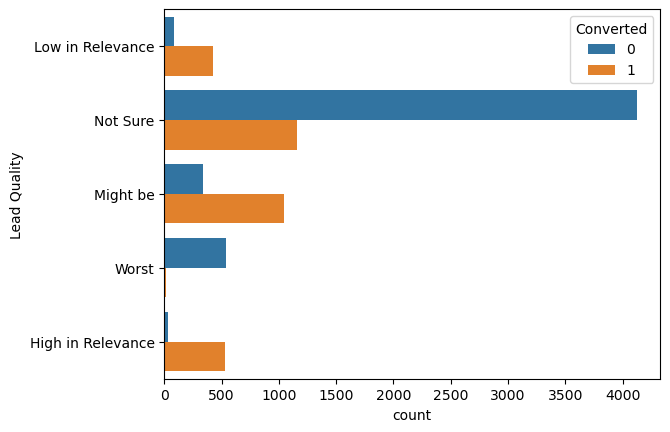

In [102]:
sns.countplot(y=lead2["Lead Quality"],hue=lead2["Converted"],data=lead2)
plt.show()

#### Observations:

#### Max count is where the lead qualtiy cant be determined thus the low conversion rate there.

#### Proportionally speaking, the highest conversion rate is for the lead quality "High in Relevance" but its count is very less "Might be Lead Qualtiy" also has a high conversion rate.

#### Getting high quality leads would be important.

Now checking the summary of "Update me on Supply Chain Content".

In [103]:
lead2["Update me on Supply Chain Content"].describe()

count     8290
unique       1
top         No
freq      8290
Name: Update me on Supply Chain Content, dtype: object

Most entries are No. Nothing to conclude here.

Plotting countplot for column City wrt Converted.

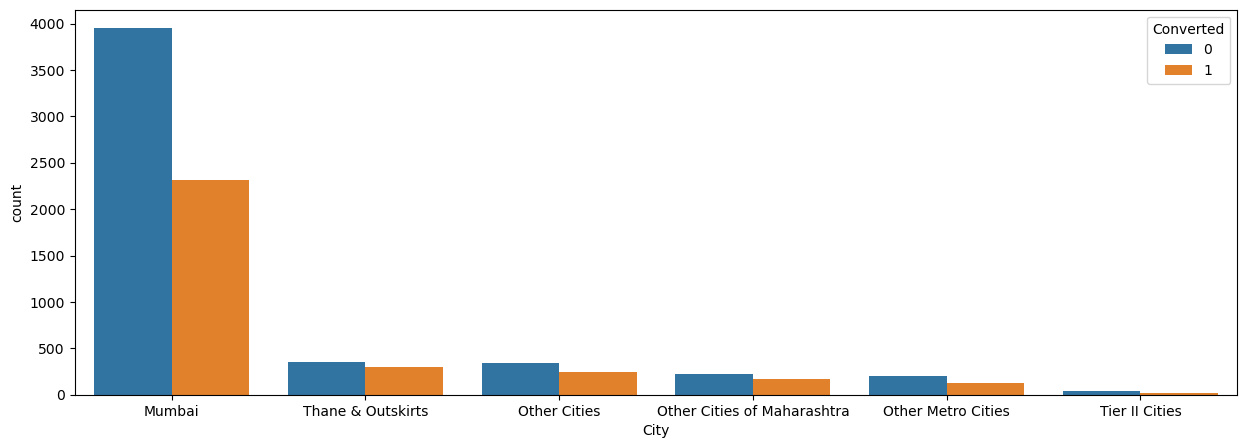

In [104]:
plt.figure(figsize=(15,5))
sns.countplot(x=lead2["City"],hue=lead2["Converted"],data=lead2)
plt.show()

#### Observations:

#### Mumbai has the max count of people registering for courses and a decent conversion rate of around 50%.

#### Thane and outskirts actually has a higher conversion rate but very less count.

#### Same goes for other cities.

#### Focus can be more people registering from Mumbai to increase their conversion rate.

Now checking the summary of "Get updates on DM Content".

In [105]:
lead2["Get updates on DM Content"].describe()

count     8290
unique       1
top         No
freq      8290
Name: Get updates on DM Content, dtype: object

Most entries are No. Nothing to conclude here.

Now checking the summary of column "I agree to pay the amount through cheque".

In [106]:
lead2["I agree to pay the amount through cheque"].describe()

count     8290
unique       1
top         No
freq      8290
Name: I agree to pay the amount through cheque, dtype: object

Most entries are No. Nothing to conclude here.

Now checking the summary of column "A free copy of Mastering The Interview".

In [107]:
lead2["A free copy of Mastering The Interview"].describe()

count     8290
unique       2
top         No
freq      5904
Name: A free copy of Mastering The Interview, dtype: object

Plotting countplot for column "A free copy of Mastering The Interview" wrt Converted.

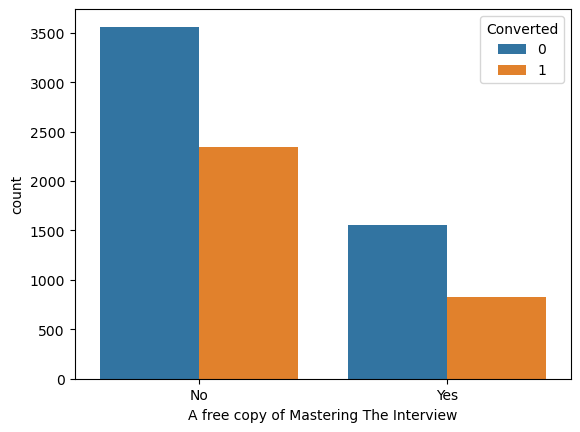

In [108]:
sns.countplot(x=lead2["A free copy of Mastering The Interview"],hue=lead2["Converted"],data=lead2)
plt.show()

#### Observations:

#### People who were not interested in getting a free copy of "Mastering the interview" have a higher conversion rate (and count) as compared to people who did opt for a free copy of "Mastering the interview".

Now checking the summary of column "Last Notable Activity".

In [109]:
lead2["Last Notable Activity"].describe()

count         8290
unique          16
top       Modified
freq          3150
Name: Last Notable Activity, dtype: object

Plotting countplot for column "Last Notable Activity" wrt Converted.

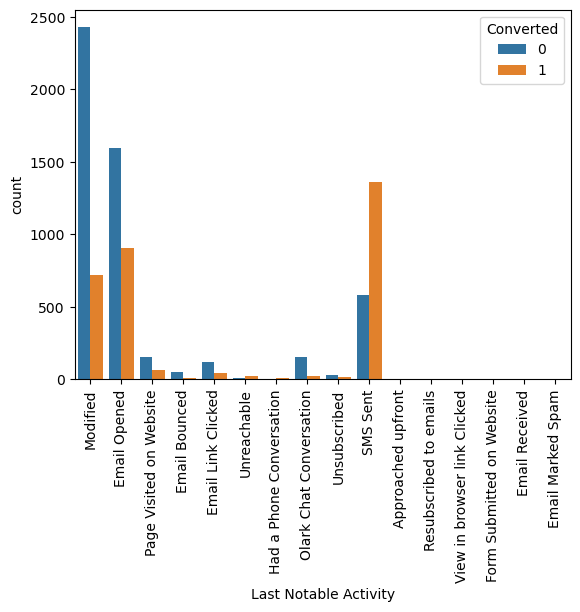

In [110]:
sns.countplot(x=lead2["Last Notable Activity"],hue=lead2["Converted"],data=lead2)
plt.xticks(rotation=90)
plt.show()

Since certain categorical values have negligible count as compared to the more prominent ones, we can combine them into Other_Activity category.

In [111]:
lead2["Last Notable Activity"]=lead2["Last Notable Activity"].replace(['Email Marked Spam','Email Received',
                                                                       'Form Submitted on Website',
                                                                       'View in browser link Clicked',
                                                                       'Resubscribed to emails',
                                                                       'Approached upfront',
                                                                       'Had a Phone Conversation'],"Other_Activity")

Again plotting countplot for column "Last Notable Activity" wrt Converted.

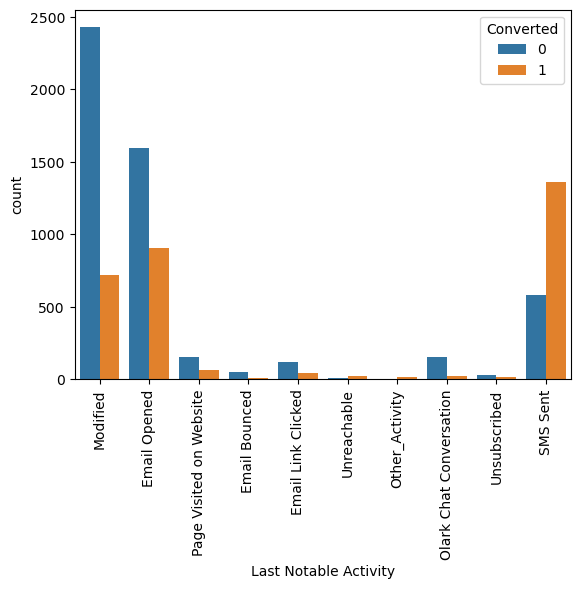

In [112]:
sns.countplot(x=lead2["Last Notable Activity"],hue=lead2["Converted"],data=lead2)
plt.xticks(rotation=90)
plt.show()

#### Observations:

#### "Modified" column might refer to people who might have modified their profile on website (just an assumption) and it has the highest count but very low conversion rate.

#### "SMS sent" has a high conversion rate but low count.

#### Overall, this column will not really help us make a business.

#### After EDA and analysis, we saw that there are certain columns which will not help us with our analysis, so we drop them.

List of variables to drop: Dropping these variables as they have most of the values towards one attribute and using them might introduce bias in the model.

In [113]:
unwanted_columns = ['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                   'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','What matters most to you in choosing a course']

In [114]:
lead3=lead2.drop(unwanted_columns,axis=1)

In [115]:
lead3.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [116]:
lead3.shape

(8290, 16)

# Step 5: Data Preparation

#### Binary mapping

Columns 'Do Not Email', 'Do Not Call' have values Yes or No. So we can map them as 0 or 1. Defining a function to map those values to 0 or 1.

In [117]:
varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead3[varlist] = lead3[varlist].apply(binary_map)

In [118]:
lead3.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Others                      Unemployed   
1                   Others                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Others                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### Creating dummies
There are some categorical columns for that we need to create dummies.

In [119]:
categorical_vars=["Lead Origin",'Lead Source',"Specialization",'Tags','Last Activity','What is your current occupation',
                  'Lead Quality','City','Last Notable Activity']

In [120]:
dummies1=pd.get_dummies(lead3[categorical_vars],drop_first=True)
dummies1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  ...  City_Tier II Cities  \
0                   0                      0  ...                    0   
1                   0                      0  ...                    0   
2                   0                      0  ...                    0   
3                   0                      0  ...                    0   
4                   0                      0  ...                    0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  

Dummy variables have been created. So now we need to concatenate them with our dataframe lead3 and assign a new dataframe to it lead4.

In [121]:
lead4 = pd.concat([lead3,dummies1],axis=1)
lead4.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... City_Tier II Cities Last Notable Activity_Email Link Clicked  \
0  ...                   0                                        0   
1  ...                   0                                        0   
2  ...                   0                                        0   
3  ...                   0                                        0   
4  ...                   0                                        0   

  Last Notable Activity_Email Opened Last Notable Activity_Modified  \
0                                  0                              1   
1                                  1                              0   
2                                  1                              0   
3                                  0                              1   
4                                  0                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Other_Activity  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 95 columns]

Dropping those columns for which the dummy variables have been already created, since they are of no use to us now.

In [122]:
lead4=lead4.drop(categorical_vars,axis=1)

In [123]:
lead4.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  City_Tier II Cities  \
0                        0  ...                    0   
1                        0  ...                    0   
2                        0  ...                    0   
3                        0  ...                    0   
4                        0  ...                    0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 86 columns]

# Step 6: Train test split

Dividing the dataset into X and y with X as datset dropping columns "Prospect ID" and "Converted" and y as "Converted".

In [124]:
# Define X and y
X = lead4.drop(["Prospect ID",'Converted'],axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  ...  City_Tier II Cities  \
0                           0                     0  ...                    0   
1                           0                     0  ...                    0   
2                           0                     0  ...                    0   
3                           0                     0  ...                    0   
4                           0                     0  ...                    0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Activity  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 84 columns]

In [125]:
y=lead4['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Importing scikit learn libraries for train test split, scaling, feature selection, modelling and evaluation, metrics etc.

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve

Splitting the data into X_train, X_test, y_train, y_test with 70 : 30 ratio and check the shape of both whether divided according to the ratio.

In [127]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [128]:
X_train

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
6361             0            0          0.0                            0   
8855             0            0          1.0                         1245   
8497             0            0          2.0                          210   
19               0            0          3.0                           98   
4019             0            0          2.0                           80   
...            ...          ...          ...                          ...   
403              0            0          2.0                         1268   
91               0            0          6.0                         1158   
8962             0            0          2.0                         1846   
7735             0            0          2.0                          180   
6298             0            0          4.0                         1327   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
6361                   0.0                                    0   
8855                   1.0                                    1   
8497                   2.0                                    1   
19                     3.0                                    0   
4019                   2.0                                    1   
...                    ...                                  ...   
403                    2.0                                    0   
91                     1.5                                    0   
8962                   2.0                                    1   
7735                   2.0                                    1   
6298                   4.0                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
6361                          0                        0   
8855                          0                        0   
8497                          0                        0   
19                            0                        0   
4019                          0                        0   
...                         ...                      ...   
403                           0                        0   
91                            0                        0   
8962                          0                        0   
7735                          0                        0   
6298                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
6361                           0                     0  ...   
8855                           0                     0  ...   
8497                           0                     0  ...   
19                             0                     0  ...   
4019                           0                     0  ...   
...                          ...                   ...  ...   
403                            0                     0  ...   
91                             0                     0  ...   
8962                           0                     0  ...   
7735                           0                     0  ...   
6298                           0                     0  ...   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
6361                    0                                         0   
8855                    0                                         0   
8497                    0                                         0   
19                      0                                         0   
4019                    0                                         0   
...                   ...                                       ...   
403                     0                                         0   
91                      0                                         0   
8962                    0                                         0   
7735                    0                                         0   
6298             

In [129]:
X_train.shape

(5803, 84)

## Step 7: Feature Scaling

Using StandardScaler class to scale bring all the numerical variables on equal terms so that the analysis is fair.

In [130]:
scaler= StandardScaler()

scale_vars = ["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']

X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
6361             0            0    -1.188796                    -0.855541   
8855             0            0    -0.727502                     1.426350   
8497             0            0    -0.266208                    -0.470644   
19               0            0     0.195086                    -0.675922   
4019             0            0    -0.266208                    -0.708914   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
6361             -1.272925                                    0   
8855             -0.615999                                    1   
8497              0.040926                                    1   
19                0.697852                                    0   
4019              0.040926                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
6361                          0                        0   
8855                          0                        0   
8497                          0                        0   
19                            0                        0   
4019                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
6361                           0                     0  ...   
8855                           0                     0  ...   
8497                           0                     0  ...   
19                             0                     0  ...   
4019                           0                     0  ...   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
6361                    0                                         0   
8855                    0                                         0   
8497                    0                                         0   
19                      0                                         0   
4019                    0                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
6361                                   1                               0   
8855                                   0                               1   
8497                                   0                               1   
19                                     0                               1   
4019                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
6361                                              0   
8855                                              0   
8497                                              0   
19                                                0   
4019                                              0   

      Last Notable Activity_Other_Activity  \
6361                                     0   
8855                                     0   
8497                                     0   
19                                       0   
4019                                     0   

      Last Notable Activity_Page Visited on Website  \
6361                                              0   
8855                                              0   
8497                                              0   
19                                                0   
4019                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
6361                               0                                  0   
8855                               0                                  0   
8497                               0                                  0   
19                                 0                                  0   
4019                               0                                  0   

      Last Notable Activity_Unsubscribed  
6361                                   0  
8855                                   0

## Step 8: Model Building

Importing statsmodels for model building and variance inflation factor values.

In [131]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Building the first logistic regression model1 by adding constant and fitting the model.

In [132]:
X_train_sm = sm.add_constant(X_train)
model_1 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())

model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5803
Model:                            GLM   Df Residuals:                     5718
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.4
Date:                Tue, 16 Jan 2024   Deviance:                       2326.9
Time:                        15:57:53   Pearson chi2:                 3.12e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5854      2.375     -1.510      0.131      -8.240       1.069
Do Not Email                                            -0.9777      0.309     -3.162      0.002      -1.584      -0.372
Do Not Call                                             20.6490   2.16e+05   9.56e-05      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.2425      0.091      2.656      0.008       0.064       0.421
Total Time Spent on Website                              1.0909      0.066     16.573      0.000       0.962       1.220
Page Views Per Visit                                    -0.3124      0.104     -3.002      0.003      -0.516      -0.108
Lead Origin_Landing Page Submission                     -0.6221      0.243     -2.560      0.010      -1.098      -0.146
Lead Origin_Lead Add Form                                2.4039      0.908      2.647      0.008       0.624       4.184
Lead Origin_Lead Import                                 29.3003   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Origin_Quick Add Form                              25.4665   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -29.4049   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.0752      0.169      0.445      0.656      -0.256       0.406
Lead Source_Olark Chat                                   1.0367      0.252      4.120      0.000       0.544       1.530
Lead Source_Organic Search                               0.2869      0.238      1.204      0.229      -0.180       0.754
Lead Source_Others                                      -0.2345      1.101     -0.213      0.831      -2.392       1.923
Lead Source_Reference                                   -1.2931      0.971     -1.331      0.183      -3.197       0.611
Lead Source_Referral Sites                               0.0621      0.530      0.117      0.907      -0.977       1.101
Lead Source_Welingak Website                             3.3550      1.365      2.457      0.014       0.679       6.031
Specialization_Business Administration                   0.7964      0.419      1.900      0.057      -0.025       1.618
Specialization_E-Business                                0.1588      0.768      0.207      0.836      -1.347       1.664
Specialization_E-COMMERCE                                0.9257      0.594      1.558      0.119      -0.239       2.091
Specialization_Finance Management                        0.0704      0.369      0.191      0.849      -0.652       0.793
Specialization_Healthcare Management                     0

##### Feature Scaling Using RFE

Building model using RFE (Recursive Feature Elimination) from sklearn which is an automated process of selecting columns and build a model. Selecting number of features = 15 as to we need atleast 15 faetures by automated process and then we can drop those features further based on our requirements by p-values and VIFs.

In [133]:
lm = LogisticRegression(max_iter=400)

rfe = RFE(lm,n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [134]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 5),
 ('Do Not Call', False, 70),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', False, 10),
 ('Page Views Per Visit', False, 46),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', False, 63),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 71),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 69),
 ('Specialization_E-COMMERCE', False, 23),
 ('Specialization_Finance Management', False, 49),
 ('Specialization_Healthcare Management', False, 75),
 ('Specialization_Hospitality Management', False, 54),
 ('Specialization_Human Reso

rfe.support_ gives us the features which it wants to be included for the model and ~rfe.support_ gives us the features which it wants not to be included for the model.

In [135]:
col_top10=X_train.columns[rfe.support_]
col_top10

Index(['Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [136]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specializati

Since we want to build model based on RFE we include those columns and build the train model.

In [137]:
X_train_rfe=X_train[col_top10]

#### Function for calculating Variance Inflation Factor (V.I.F) and print them.
Creating a function that will create a dataframe containing names of all the features and their current VIF values.

For building a good model, we need the p-values of the features to be less than 0.05 and VIF values to be less than 5.

Checking the VIF values of current model X_train_rfe.

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                 Tags_Busy  1.10
6                         Tags_switched off  1.10
0              Lead Source_Welingak Website  1.05
3                         Tags_Lost to EINS  1.03
2                   Tags_Closed by Horizzon  1.01
4                              Tags_Ringing  0.47
8                        Lead Quality_Worst  0.35
9            Last Notable Activity_SMS Sent  0.10
5  Tags_Will revert after reading the email  0.09
7                     Lead Quality_Not Sure  0.07

Logistic regression model with top 10 columns choosen by rfe.

In [139]:
X_train_sm= sm.add_constant(X_train_rfe)

model_2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

ls=model_2.fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5803
Model:                            GLM   Df Residuals:                     5792
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1484.3
Date:                Tue, 16 Jan 2024   Deviance:                       2968.5
Time:                        15:58:08   Pearson chi2:                 2.57e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5613
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9373      0.220     -8.814      0.000      -2.368      -1.507
Lead Source_Welingak Website                 5.1266      1.015      5.053      0.000       3.138       7.115
Tags_Busy                                    4.2492      0.348     12.207      0.000       3.567       4.931
Tags_Closed by Horizzon                      8.3699      0.765     10.935      0.000       6.870       9.870
Tags_Lost to EINS                            8.6284      0.577     14.959      0.000       7.498       9.759
Tags_Ringing                                -1.6472      0.348     -4.738      0.000      -2.329      -0.966
Tags_Will revert after reading the email     4.0585      0.241     16.831      0.000       3.586       4.531
Tags_switched off                           -2.6654      0.791     -3.372      0.001      -4.215      -1.116
Lead Quality_Not Sure                       -3.6907      0.131    -28.068      0.000      -3.948      -3.433
Lead Quality_Worst                          -4.5613      0.870     -5.245      0.000      -6.266      -2.857
Last Notable Activity_SMS Sent               2.7537      0.123     22.379      0.000       2.513       2.995
============================================================================================================
"""

Removing the feature "Tags_switched off" as it contains high VIF as well as p-value.

In [140]:
X_train_new = X_train_rfe.drop(["Tags_switched off"], axis = 1)

Check for the VIF values of the feature variables.

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                 Tags_Busy  1.09
0              Lead Source_Welingak Website  1.04
3                         Tags_Lost to EINS  1.03
2                   Tags_Closed by Horizzon  1.01
4                              Tags_Ringing  0.46
7                        Lead Quality_Worst  0.35
8            Last Notable Activity_SMS Sent  0.10
5  Tags_Will revert after reading the email  0.09
6                     Lead Quality_Not Sure  0.06

Building another model and then check the current p-values after dropping "Tags_switched off".

In [142]:
X_train_sm1= sm.add_constant(X_train_new)

model_3=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())

ls1=model_3.fit()
ls1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5803
Model:                            GLM   Df Residuals:                     5793
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.1
Date:                Tue, 16 Jan 2024   Deviance:                       2986.3
Time:                        15:58:10   Pearson chi2:                 2.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5599
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3322      0.221    -10.558      0.000      -2.765      -1.899
Lead Source_Welingak Website                 5.1171      1.014      5.044      0.000       3.129       7.105
Tags_Busy                                    4.6694      0.344     13.573      0.000       3.995       5.344
Tags_Closed by Horizzon                      8.7461      0.765     11.427      0.000       7.246      10.246
Tags_Lost to EINS                            8.9866      0.576     15.598      0.000       7.857      10.116
Tags_Ringing                                -1.1864      0.340     -3.485      0.000      -1.854      -0.519
Tags_Will revert after reading the email     4.4604      0.241     18.535      0.000       3.989       4.932
Lead Quality_Not Sure                       -3.6816      0.131    -28.071      0.000      -3.939      -3.425
Lead Quality_Worst                          -4.3553      0.929     -4.686      0.000      -6.177      -2.534
Last Notable Activity_SMS Sent               2.6760      0.120     22.344      0.000       2.441       2.911
============================================================================================================
"""

Checking the correlations between the columns of lead4 dataframe.

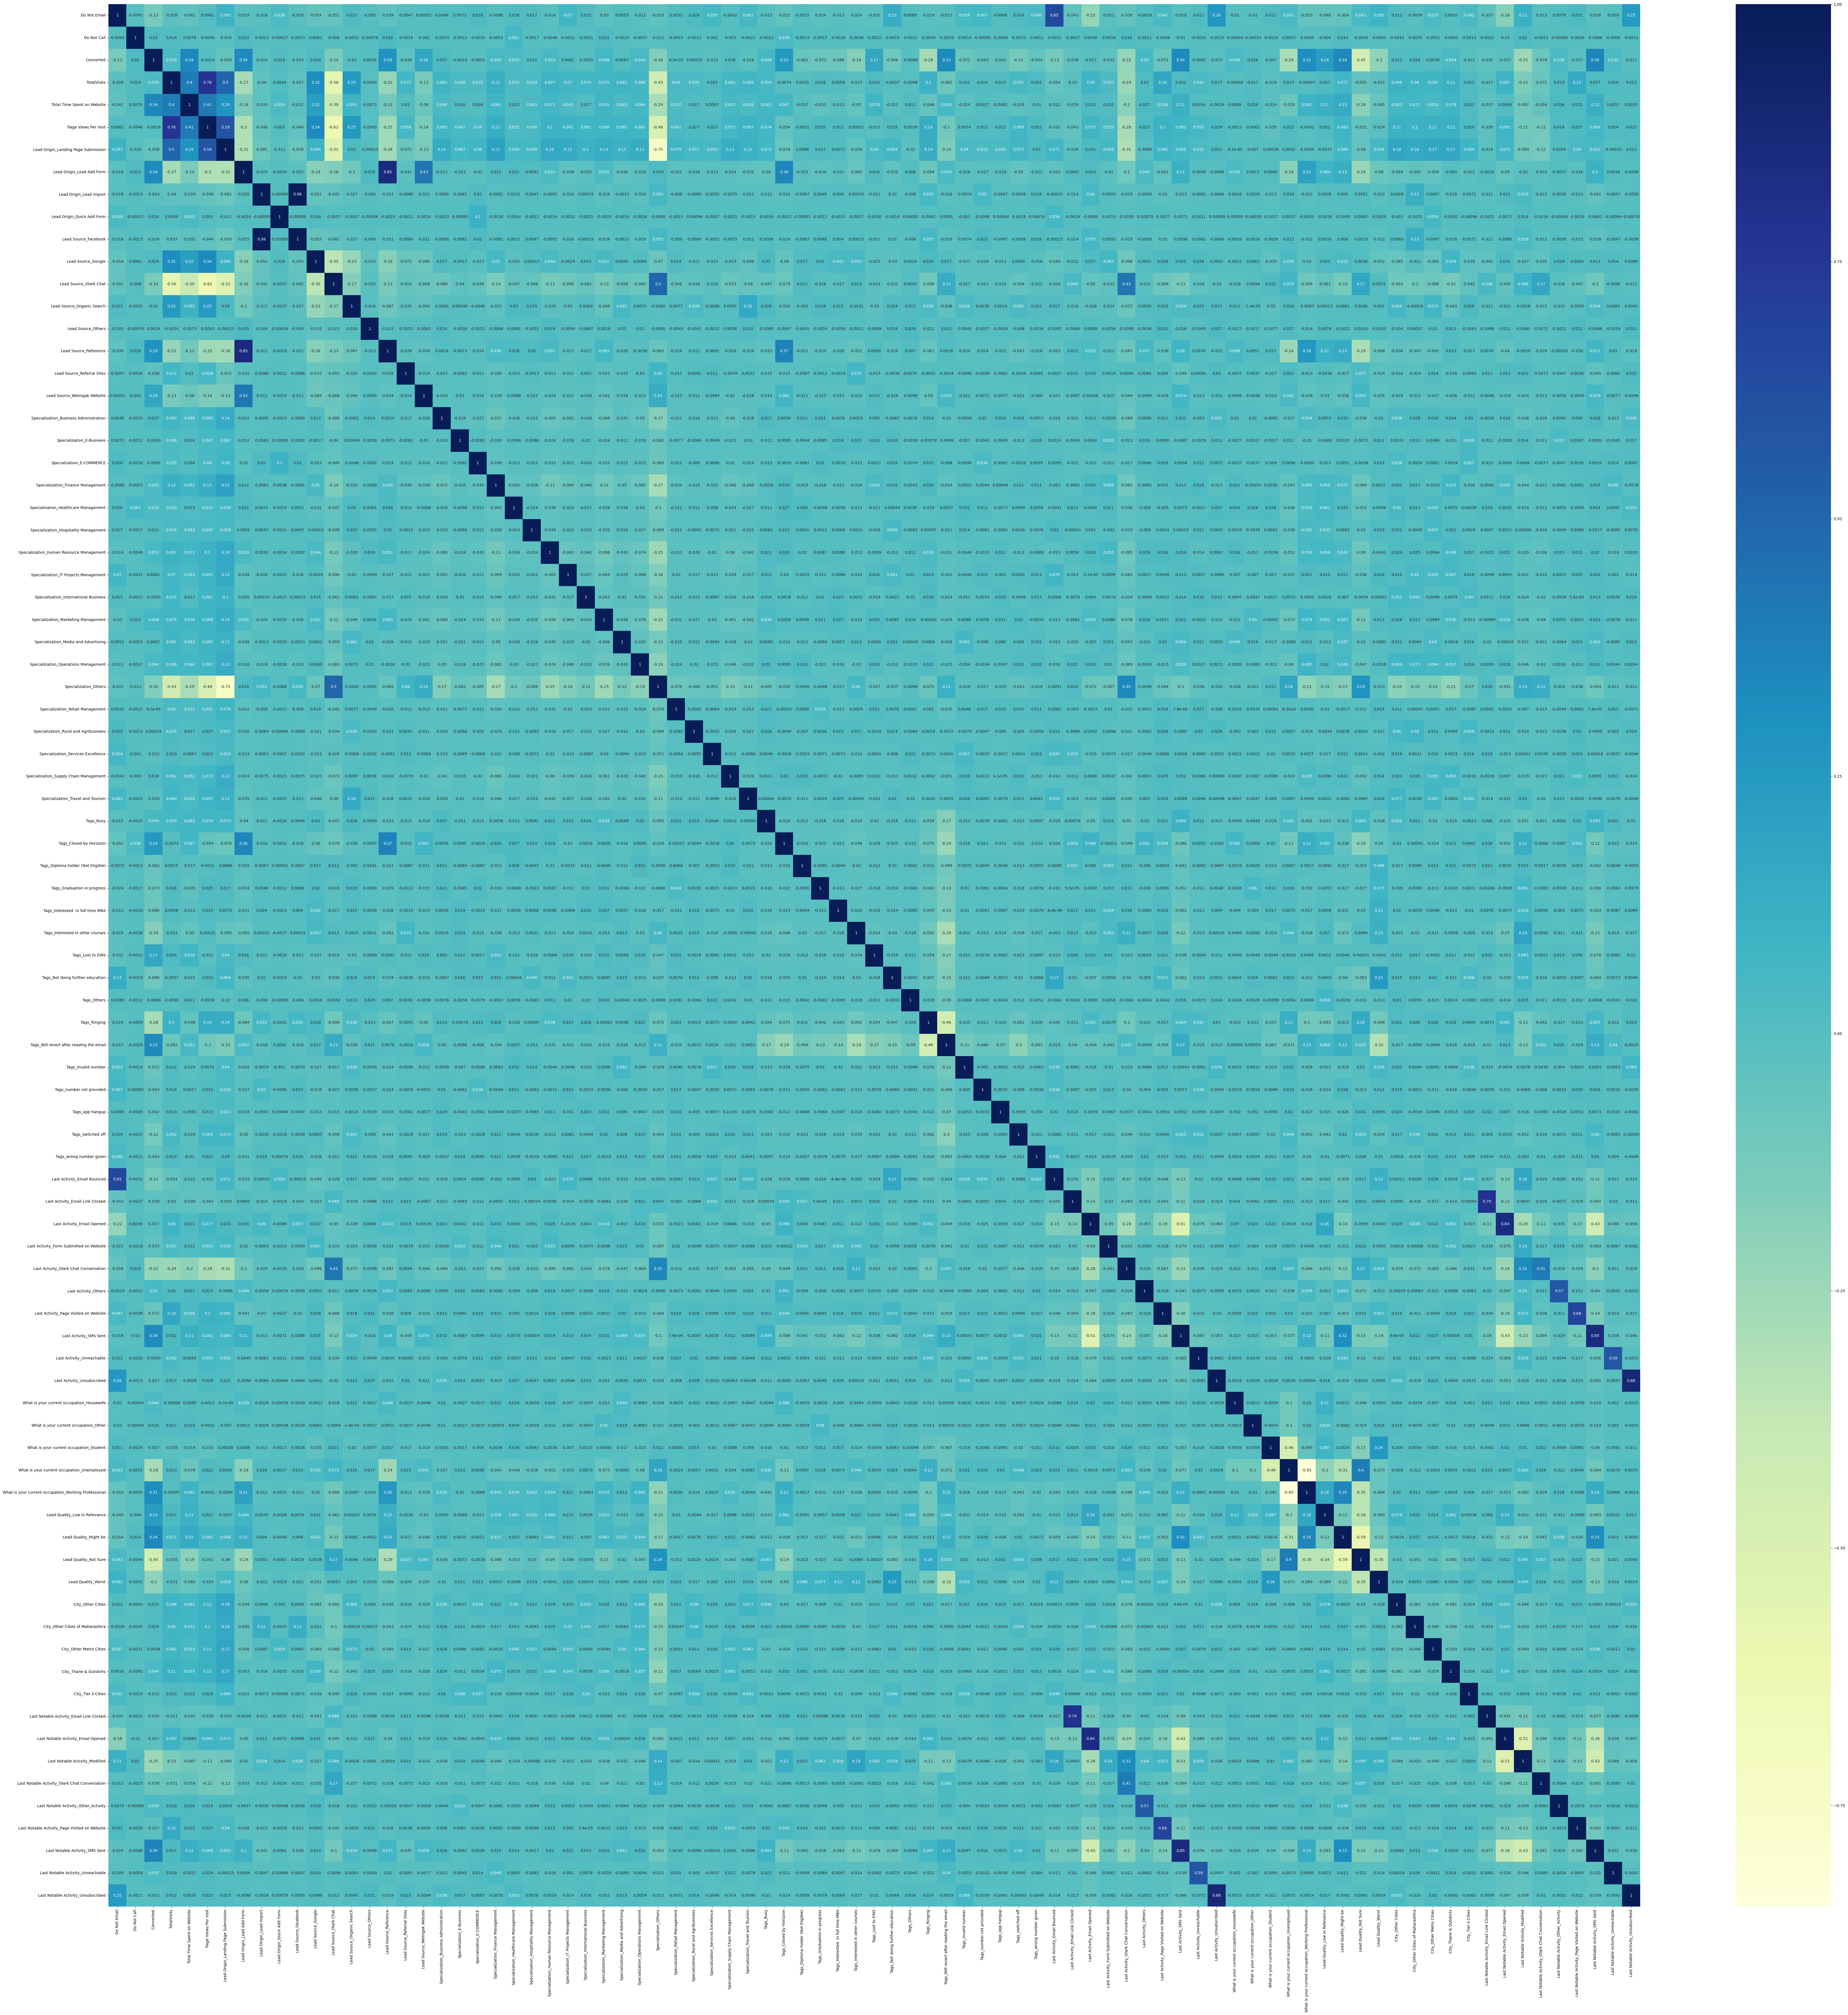

In [143]:
plt.figure(figsize = (90, 90))
sns.heatmap(lead4.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Observations:

#### - This was just a second measure to understand if we are missing any corelations which might help us with the model
#### - There are not many high corelations except the ones like Last Activity_Unsubscribed and Last Notable Activity_Unsubscribed. These are the type of corelations that dont make sense as they are actually same variables told differently

Getting the prediction values on the training data set.

In [144]:
y_train_pred= ls1.predict(X_train_sm1)
y_train_pred[:10]

6361    0.893610
8855    0.893610
8497    0.088490
19      0.001245
4019    0.174588
3239    0.174588
242     0.893610
7190    0.754461
8697    0.010727
5634    0.174588
dtype: float64

In [145]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8936102 , 0.8936102 , 0.08848971, 0.00124486, 0.17458792,
       0.17458792, 0.8936102 , 0.75446091, 0.01072699, 0.17458792])

Creating a final data set with the conversion score.

In [146]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Converted_probability": y_train_pred})

y_train_pred_final["Prospect ID"]= y_train.index
y_train_pred_final.head()

Converted  Converted_probability  Prospect ID
0          1               0.893610         6361
1          1               0.893610         8855
2          0               0.088490         8497
3          0               0.001245           19
4          0               0.174588         4019

Creating a new column to predict the conversion of a certain person

In [147]:
y_train_pred_final["Predicted"]=y_train_pred_final.Converted_probability.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

Converted  Converted_probability  Prospect ID  Predicted
0          1               0.893610         6361          1
1          1               0.893610         8855          1
2          0               0.088490         8497          0
3          0               0.001245           19          0
4          0               0.174588         4019          0

### Confusion Matrix

In [148]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3400  153]
 [ 324 1926]]


In [149]:
## Predicted    not_conv    conv
## Actual
## not_conv    3400         153
## conv        324          1926

##### Accuracy

In [150]:
# Overall model Accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final["Predicted"]))

0.9178011373427537


### So the model accuracy is 91.78%.

Sensitivity,specificity, false positive rate, Positive predictive value,negative predictive value

In [151]:
# True positive(TP), True Negative(TN), False Positive(FP), False Negative(FN)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [152]:
print("Sensitivity {}\n".format((TP)/(TP+FN)))
print("Specificity {}\n".format((TN)/(TN+FP)))
print("False Positive Rate {}\n".format((FP)/(TN+FP)))
print("Positive Predictive value {}\n".format((TP)/(TP+FP)))
print("Negative Predictive value {}\n".format((TN)/(TN+FN)))
print("True Positive Rate {}\n".format((TP)/(TP+FN)))
print("False Positive Rate {}\n".format((FP)/(TN+FP)))

Sensitivity 0.856

Specificity 0.9569377990430622

False Positive Rate 0.0430622009569378

Positive Predictive value 0.9264069264069265

Negative Predictive value 0.9129967776584318

True Positive Rate 0.856

False Positive Rate 0.0430622009569378



# Step 9: Plotting the ROC curve

#### An ROC curve will help us understand the below things:

#### - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will cause a decrease in specificity).
#### - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [153]:
def roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve sensitivity vs specificity')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_probability"], 
                                         drop_intermediate= False)

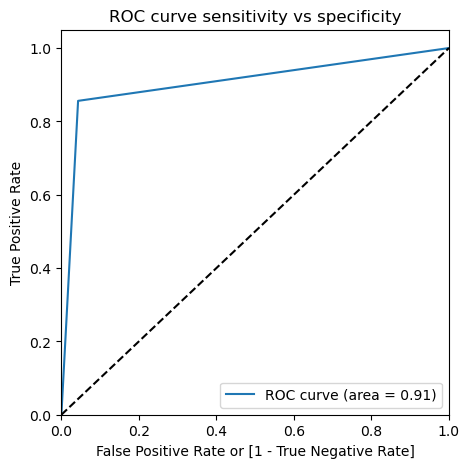

In [155]:
roc(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

# Step 10: Finding optimal cut-off point

Optimal cut-off probability is the probability where we get a balance between sensitivity and Specificity. 

In [156]:
#let's create columns with different probability cutoffs
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]=y_train_pred_final["Converted_probability"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Converted  Converted_probability  Prospect ID  Predicted  0.0  0.1  0.2  \
0          1               0.893610         6361          1    1    1    1   
1          1               0.893610         8855          1    1    1    1   
2          0               0.088490         8497          0    1    0    0   
3          0               0.001245           19          0    1    0    0   
4          0               0.174588         4019          0    1    1    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1    1    0  
1    1    1    1    1    1    1    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [157]:
# Calculating sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
cutoff_df

probability  accuracy  sensitivity  specificity
0.0          0.0  0.387730     1.000000     0.000000
0.1          0.1  0.688609     0.982222     0.502674
0.2          0.2  0.910047     0.869333     0.935829
0.3          0.3  0.909702     0.857333     0.942865
0.4          0.4  0.917801     0.856000     0.956938
0.5          0.5  0.917801     0.856000     0.956938
0.6          0.6  0.919180     0.852000     0.961722
0.7          0.7  0.919180     0.852000     0.961722
0.8          0.8  0.875926     0.704000     0.984802
0.9          0.9  0.779252     0.441333     0.993245

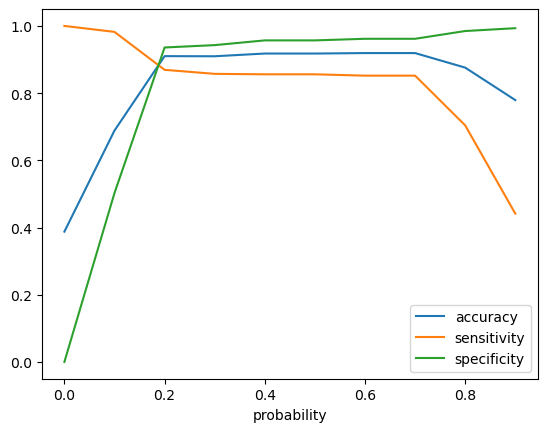

In [158]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability',y=["accuracy",'sensitivity','specificity'])
plt.show()

#### From the above curve approximately 0.2 is the optimum probability as thats where the accuracy, sensitivity and specificity coincide

In [159]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_probability"].map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Converted  Converted_probability  Prospect ID  Predicted  0.0  0.1  0.2  \
0          1               0.893610         6361          1    1    1    1   
1          1               0.893610         8855          1    1    1    1   
2          0               0.088490         8497          0    1    0    0   
3          0               0.001245           19          0    1    0    0   
4          0               0.174588         4019          0    1    1    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1    1    0                1  
1    1    1    1    1    1    1    0                1  
2    0    0    0    0    0    0    0                0  
3    0    0    0    0    0    0    0                0  
4    0    0    0    0    0    0    0                0

In [160]:
y_train_pred_final["Lead_score"] = y_train_pred_final["Converted_probability"].map(lambda x: round(x*100))

y_train_pred_final.head()

Converted  Converted_probability  Prospect ID  Predicted  0.0  0.1  0.2  \
0          1               0.893610         6361          1    1    1    1   
1          1               0.893610         8855          1    1    1    1   
2          0               0.088490         8497          0    1    0    0   
3          0               0.001245           19          0    1    0    0   
4          0               0.174588         4019          0    1    1    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_score  
0    1    1    1    1    1    1    0                1          89  
1    1    1    1    1    1    1    0                1          89  
2    0    0    0    0    0    0    0                0           9  
3    0    0    0    0    0    0    0                0           0  
4    0    0    0    0    0    0    0                0          17

#### Checking model accuracy, confusion matrix and all those metrics again

In [161]:
metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

# True positive
TP = confusion2[1,1]

# True negative
TN = confusion2[0,0]

# False positive
FP = confusion2[0,1]

# False negative
FN = confusion2[1,0]

In [162]:
print("Sensitivity {}\n".format(((TP)/(TP + FN))))

print("Specificity {}\n".format(((TN)/(TN + FP))))

print("False Positive Rate {}\n".format(((FP)/(TN + FP))))

print("Positive Predictive value {}\n".format(((TP)/(TP + FP))))

print("Negative Predictive value {}\n".format(((TN)/(TN + FN))))

print("True Positive rate {}\n".format(((TP)/(TP + FN))))

print("False Positive rate {}\n".format(((FP)/(TN + FP))))

Sensitivity 0.8693333333333333

Specificity 0.9358288770053476

False Positive Rate 0.06417112299465241

Positive Predictive value 0.8956043956043956

Negative Predictive value 0.9187620889748549

True Positive rate 0.8693333333333333

False Positive rate 0.06417112299465241



#### Precision and Recall

In [163]:
print("Precision {}\n".format((TP)/(TP+FP)))
print("Recall {}\n".format((TP)/(TP+FN)))

Precision 0.8956043956043956

Recall 0.8693333333333333



In [164]:
print("Precision {}".format(precision_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])))
print("Recall {}".format(recall_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])))

Precision 0.8956043956043956
Recall 0.8693333333333333


#### Precision and Recall trade-off

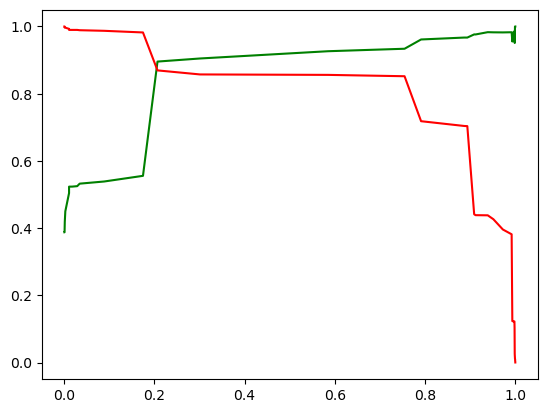

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_probability"])
                                                             
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [166]:
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
6512             1            0     1.117674                    -0.835380   
8797             0            0    -1.188796                    -0.855541   
1426             0            0    -1.188796                    -0.855541   
737              0            0    -1.188796                    -0.855541   
7555             0            0     2.962849                    -0.571450   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
6512              0.369389                                    1   
8797             -1.272925                                    0   
1426             -1.272925                                    0   
737              -1.272925                                    0   
7555             -0.287537                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
6512                          0                        0   
8797                          0                        0   
1426                          0                        0   
737                           1                        0   
7555                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
6512                           0                     0  ...   
8797                           0                     0  ...   
1426                           0                     0  ...   
737                            0                     0  ...   
7555                           0                     0  ...   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
6512                    0                                         0   
8797                    0                                         0   
1426                    0                                         0   
737                     0                                         0   
7555                    0                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
6512                                   0                               0   
8797                                   1                               0   
1426                                   0                               1   
737                                    1                               0   
7555                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
6512                                              0   
8797                                              0   
1426                                              0   
737                                               0   
7555                                              0   

      Last Notable Activity_Other_Activity  \
6512                                     0   
8797                                     0   
1426                                     0   
737                                      0   
7555                                     0   

      Last Notable Activity_Page Visited on Website  \
6512                                              0   
8797                                              0   
1426                                              0   
737                                               0   
7555                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
6512                               1                                  0   
8797                               0                                  0   
1426                               0                                  0   
737                                0                                  0   
7555                               0                                  0   

      Last Notable Activity_Unsubscribed  
6512                                   0  
8797                                   0

In [167]:
X_test = X_test[col_top10]
X_test.head()

Lead Source_Welingak Website  Tags_Busy  Tags_Closed by Horizzon  \
6512                             0          0                        0   
8797                             0          0                        0   
1426                             0          0                        0   
737                              1          0                        0   
7555                             0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
6512                  0             0   
8797                  0             0   
1426                  0             0   
737                   0             0   
7555                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
6512                                         0                  1   
8797                                         1                  0   
1426                                         1                  0   
737                                          1                  0   
7555                                         0                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
6512                      1                   0   
8797                      1                   0   
1426                      1                   0   
737                       0                   0   
7555                      1                   0   

      Last Notable Activity_SMS Sent  
6512                               1  
8797                               0  
1426                               0  
737                                0  
7555                               0

In [168]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = ls.predict(X_test_sm)

y_test_pred[:10]

6512    0.003912
8797    0.172301
1426    0.172301
737     0.999289
7555    0.003583
5366    0.003583
829     0.892953
877     0.892953
426     0.892953
3748    0.003583
dtype: float64

In [169]:
#Convert y_test_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

0
6512  0.003912
8797  0.172301
1426  0.172301
737   0.999289
7555  0.003583

In [170]:
#Convert y_test to a DataFrame
y_test_df = pd.DataFrame(y_test)

y_test_df["Prospect ID"] = y_test_df.index

In [171]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

y_pred_final.head()

Converted  Prospect ID         0
0          0         6512  0.003912
1          0         8797  0.172301
2          0         1426  0.172301
3          1          737  0.999289
4          0         7555  0.003583

In [173]:
# Rename the last column to show Conversion probability
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

# Rearrange the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_probability'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_probability
0         6512          0               0.003912
1         8797          0               0.172301
2         1426          0               0.172301
3          737          1               0.999289
4         7555          0               0.003583

In [174]:
y_pred_final['final_predicted'] = y_pred_final["Converted_probability"].map(lambda x: 1 if x > 0.2 else 0)

In [175]:
y_pred_final.head()

Prospect ID  Converted  Converted_probability  final_predicted
0         6512          0               0.003912                0
1         8797          0               0.172301                0
2         1426          0               0.172301                0
3          737          1               0.999289                1
4         7555          0               0.003583                0

In [176]:
# Overall model accuracy
metrics.accuracy_score(y_pred_final["Converted"],y_pred_final['final_predicted'])

0.9131483715319663

#### Model accuracy on test set is 91.31%.

In [177]:
confusion_final = metrics.confusion_matrix(y_pred_final["Converted"],y_pred_final["final_predicted"])
confusion_final

array([[1471,   97],
       [ 119,  800]], dtype=int64)

In [178]:
# True positive
TP = confusion_final[1,1]

# True negative
TN = confusion_final[0,0]

# False positive
FP = confusion_final[0,1]

# False negative
FN = confusion_final[1,0]

print("Sensitivity {}\n".format(((TP)/(TP + FN))))

print("Specificity {}\n".format(((TN)/(TN + FP))))

print("False Positive Rate {}\n".format(((FP)/(TN + FP))))

print("Positive Predictive value {}\n".format(((TP)/(TP + FP))))

print("Negative Predictive value {}\n".format(((TN)/(TN + FN))))

print("True Positive rate {}\n".format(((TP)/(TP + FN))))

print("False Positive rate {}\n".format(((FP)/(TN + FP))))

Sensitivity 0.8705114254624592

Specificity 0.9381377551020408

False Positive Rate 0.06186224489795918

Positive Predictive value 0.8918617614269788

Negative Predictive value 0.9251572327044025

True Positive rate 0.8705114254624592

False Positive rate 0.06186224489795918



In [179]:
print("Precision {}\n".format((TP)/(TP+FP)))
print("Recall {}\n".format((TP)/(TP+FN)))

Precision 0.8918617614269788

Recall 0.8705114254624592



## Conclusions:

#### - This logistic regression model in our analysis primraily focuses on estimating the probability of a particular value for the target variable instead of directly forecasting the target column value for every lead. Also, a threshold is used to derive the predicted value for the target variable.
#### - In our model, the logistic regression is applied to predict the likelihood of a lead's conversion into customer.
#### - 0.2 is the optimum probability as thats where the accuracy, sensitivity and specificity coincide, so any lead with probability greater than 0.2 will be classified as a "Hot Lead" whereas any lead below this values will be a cold lead.
####        Our finalized logistic model comprises 9 features with coefficients:
####        Lead Source_Welingak Website 5.1171
####        Tags_Busy 4.6694
####        Tags_Closed by Horizzon 8.7461
####        Tags_Lost to EINS 8.9866
####        Tags_Ringing -1.1864
####        Tags_Will revert after reading the email 4.4604
####        Lead Quality_Not Sure -3.6816
####        Lead Quality_Worst -4.3553
####        Last Notable Activity_SMS Sent 2.6760

## The foremost 3 categorical/dummy variables in the final model as per their coefficients are:
## - 'Tags_Lost to EINS' (Coefficient factor = 8.9866)
## - 'Tags_Closed by Horizzon' (Coefficient factor = 8.7461)
## - 'Lead Source_Welingak Website' (Coefficient factor = 5.1171)

#### Additionally we built model for predicting the "Converted" value for every lead and "Lead Score" using the train and test data.